# Kaggle
## Competition NFL Big Data Bowl

In [1]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Misc lib
import pandasql as ps
import re 
import math, string, os

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

In [2]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv')
print ("Data is ready !!")

Data is ready !!


# Explicação do NFL

In [3]:
from IPython.display import Image
Image(url = '../images/NFL_Image_01.png')

# Analise geral do dataset

In [4]:
# Visualizando os primeiros registros do dataset
train.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [5]:
# Visualizando os tipos das features
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [6]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

,count,mean,std,min,25%,50%,75%,max
GameId,509762.0,2.017594e+09,4.997098e+05,2.017091e+09,2.017111e+09,2.017123e+09,2.018110e+09,2.018123e+09
PlayId,509762.0,2.017594e+13,4.997098e+09,2.017091e+13,2.017111e+13,2.017123e+13,2.018110e+13,2.018123e+13
X,509762.0,6.004030e+01,2.543526e+01,6.600000e-01,3.909000e+01,6.029000e+01,8.097000e+01,1.168400e+02
Y,509762.0,2.678354e+01,7.238206e+00,1.850000e+00,2.273000e+01,2.679000e+01,3.086000e+01,5.645000e+01
S,509762.0,2.591912e+00,1.383601e+00,0.000000e+00,1.500000e+00,2.470000e+00,3.560000e+00,9.410000e+00
A,509762.0,1.683176e+00,9.764122e-01,0.000000e+00,9.400000e-01,1.540000e+00,2.290000e+00,1.471000e+01
Dis,509762.0,2.794058e-01,1.454822e-01,0.000000e+00,1.700000e-01,2.700000e-01,3.900000e-01,1.390000e+00
Orientation,509744.0,1.802478e+02,1.042983e+02,0.000000e+00,9.063000e+01,1.797000e+02,2.704000e+02,3.600000e+02
Dir,509748.0,1.799339e+02,1.063195e+02,0.000000e+00,8.983000e+01,1.800900e+02,2.701900e+02,3.600000e+02
NflId,509762.0,2.344703e+06,6.418871e+05,2.220000e+02,2.532865e+06,2.543765e+06,2.555343e+06,2.561671e+06


# Data Missing

In [7]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [252]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('FieldPosition', 1.26),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffenseFormation', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefendersInTheBox', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week', 0.0),
 ('Stadium', 0.0),
 ('Location', 0.0),
 ('StadiumType', 0.0),
 ('Turf', 0.0),
 ('GameWeather', 0.0),
 ('Temperature', 0.0),
 ('Humidity'

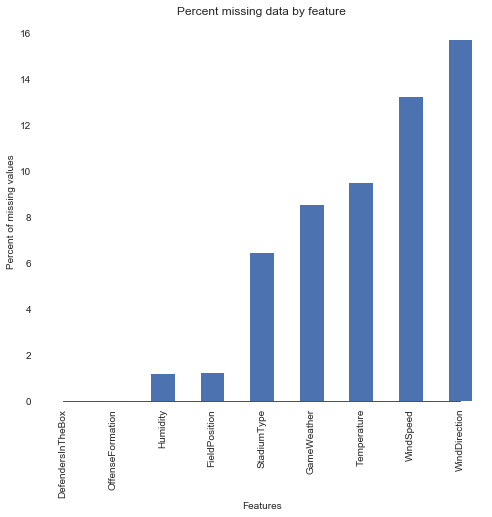

In [9]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [10]:
# Funcao para tratar os dados missing de cada variavel
def fill_na(data):
    data['WindDirection'].fillna('unknown',inplace=True)
    data['OffenseFormation'].fillna('unknown',inplace=True)
    data['StadiumType'].fillna('unknown',inplace=True)
    data['GameWeather'].fillna('unknown',inplace=True)
    
    data['Temperature'].fillna(data['Temperature'].mean(), inplace=True)
    data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
    data['DefendersInTheBox'].fillna(math.ceil(data['DefendersInTheBox'].mean()),inplace=True)

    #data['FieldPosition'].fillna(data['FieldPosition'].mean(), inplace=True)


# Criando as funções auxiliares de limpeza e conversao

In [224]:
# Funcao para agrupar as descricoes dos tipos de estadio
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown' # se for n/a
    
# Funcao para agrupar as descricoes dos estadios
def agrupar_estadio(Stadium):

    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
   
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'

    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'

    elif Stadium in ('Mercedes-Benz Dome', 'Mercedes-Benz Superdome'):
        return 'Mercedes-Benz SuperDome'
    
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium', 'MetLife'):
        return 'MetLife Stadium' 
    
    elif Stadium == 'NRG':
        return 'NRG Stadium' 

    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 

    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    
    else:
        return Stadium
    
# Funcao para agrupar a localizacao do estadio e do jogo
def agrupar_local(Location):

    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location
    
# Funcao para agrupar o gramado do estadio
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf in ('FieldTurf360', 'FieldTurf 360'):
        return 'Field Turf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass', 'Natural Grass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

# Funcao para agrupar os dados de direcao do vento
def agrupa_wind_direction(WindDirection):
    wd = str(WindDirection).upper()
    
    if wd == 'N' or 'FROM N' in wd:
        return 'north'
    if wd == 'S' or 'FROM S' in wd:
        return 'south'
    if wd == 'W' or 'FROM W' in wd:
        return 'west'
    if wd == 'E' or 'FROM E' in wd:
        return 'east'
    
    if 'FROM SW' in wd or 'FROM SSW' in wd or 'FROM WSW' in wd:
        return 'south west'
    if 'FROM SE' in wd or 'FROM SSE' in wd or 'FROM ESE' in wd:
        return 'south east'
    if 'FROM NW' in wd or 'FROM NNW' in wd or 'FROM WNW' in wd:
        return 'north west'
    if 'FROM NE' in wd or 'FROM NNE' in wd or 'FROM ENE' in wd:
        return 'north east'
    
    if 'NW' in wd or 'NORTHWEST' in wd:
        return 'north west'
    if 'NE' in wd or 'NORTH EAST' in wd:
        return 'north east'
    if 'SW' in wd or 'SOUTHWEST' in wd:
        return 'south west'
    if 'SE' in wd or 'SOUTHEAST' in wd:
        return 'south east'

    return 'unknown'

# Funcao para agrupar as descricoes de clima
def agrupar_clima(GameWeather):
    chuva   = ['Rainy', 'Rain Chance 40%', 'Showers',
               'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
               'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain']
    nublado = ['Cloudy, light snow accumulating 1-3"', 'Party Cloudy', 'Cloudy, chance of rain',
               'Coudy', 'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
               'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
               'Partly Clouidy', '30% Chance of Rain', 'Mostly Coudy', 'Cloudy and Cool',
               'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
               'Partly Cloudy', 'Cloudy']
    limpo   = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny',
               'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
               'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
               'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
               'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
               'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny']
    neve    = ['Heavy lake effect snow', 'Snow']
    none    = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']

    
    if GameWeather in chuva:
        return 'chuva'
    elif GameWeather in nublado:
        return 'nublado'
    elif GameWeather in limpo:
        return 'limpo'
    elif GameWeather in neve:
        return 'neve'
    elif GameWeather in none:
        return 'none'
    else:
        return 'none' # se for n/a
    
# Funcao para converter a velocidade do vento
def convert_wind_speed(WindSpeed):
    ws = str(WindSpeed)

    if ws.isdigit():
        return int(ws)

    if '-' in ws:
        return int(ws.split('-')[0])

    if ws.split(' ')[0].isdigit():
        return int(ws.split(' ')[0])

    if 'mph' in ws.lower():
        return int(ws.lower().split('mph')[0])
    else:
        return 0
    
    
# Funcao para converter altura de feet-inches para centimetros
def convert_to_cm(ft_in):
    h_ft   = int(ft_in.split('-')[0])
    h_inch = int(ft_in.split('-')[1])
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    #print("Your height is : %d cm." % h_cm)   
    
    return h_cm

# Funcao para converter peso em lbs para kg
def convert_to_kg(lbs):
    kg = lbs * 0.45359237
    #print("The weight is", kg, "in kilograms")
    
    return kg

# Funcao para converter temperatura Fahrenheit para Celsius
def convert_to_celsius(fah):
    celsius = (fah - 32) * 5.0/9.0
    #print("Temperature:", fah, "Fahrenheit = ", celsius, " C")
    return celsius

# Funcao para converter as features de data e extrair dia, mes, ano, hora, minuto, segundo
def convert_data(data):
    data['PlayerBirthDate'] = pd.to_datetime(data['PlayerBirthDate'])
    data['PlayerBirthDate_day'] = data['PlayerBirthDate'].dt.day.astype(int)
    data['PlayerBirthDate_month'] = data['PlayerBirthDate'].dt.month.astype(int)
    data['PlayerBirthDate_year'] = data['PlayerBirthDate'].dt.year.astype(int)
    
    
# Funcao para criar um plot de distribuicao para cada feature
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    """
    Plot distributions for each column in a dataset.
    Seaborn countplots are used for categorical data and distplots for numerical data

    args:
    ----
    dataset {dataframe} - the data that will be plotted
    cols {int} - how many distributions to plot for each row
    width {int} - how wide each plot should be
    height {int} - how tall each plot should be
    hspace {float} - horizontal space between plots
    wspace {float} - vertical space between plots 
    """
    # plot styling
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    # calculate rows needed
    rows = math.ceil(float(dataset.shape[1]) / cols)
    # create a countplot for top 20 categorical values
    # and a distplot for all numerical values
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            # grab the top 10 for each countplot
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            # make labels only 20 characters long and rotate x labels for nicer displays
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Resolvendo missing values e realizando limpeza das features

In [12]:
# Primeiro, vou preencher os dados missing e conversao das datas
fill_na(train)
convert_data(train)

# Executar a funcao para converter a altura do jogador em cm
train['PlayerHeight'] = train['PlayerHeight'].apply(convert_to_cm)

# Executar a funcao para converter a altura do jogador em cm
train['PlayerWeight'] = train['PlayerWeight'].apply(convert_to_kg)

# Executar a funcao para converter a temperatura em Celsius
train['Temperature'] = train['Temperature'].apply(convert_to_celsius)

# Executar a funcao para agrupar o nome dos tipos de estadios
train['StadiumType'] = train['StadiumType'].apply(agrupar_tipo_estadio)

# Executar a funcao de agrupar os nomes dos estadios
train['Stadium'] = train['Stadium'].apply(agrupar_estadio)

# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Location'] = train['Location'].apply(agrupar_local)

# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Turf'] = train['Turf'].apply(agrupar_gramado)

# Executar a funcao de agrupar a descricao da direção do vento
train['WindDirection'] = train['WindDirection'].apply(agrupa_wind_direction)

# Executar a funcao de converter a velocidade do vento para numerico
train['WindSpeed'] = train['WindSpeed'].apply(convert_wind_speed)

# Executar a funcao de agrupar a descricao do clima
train['GameWeather'] = train['GameWeather'].apply(agrupar_clima)

# Analisando Correlacoes

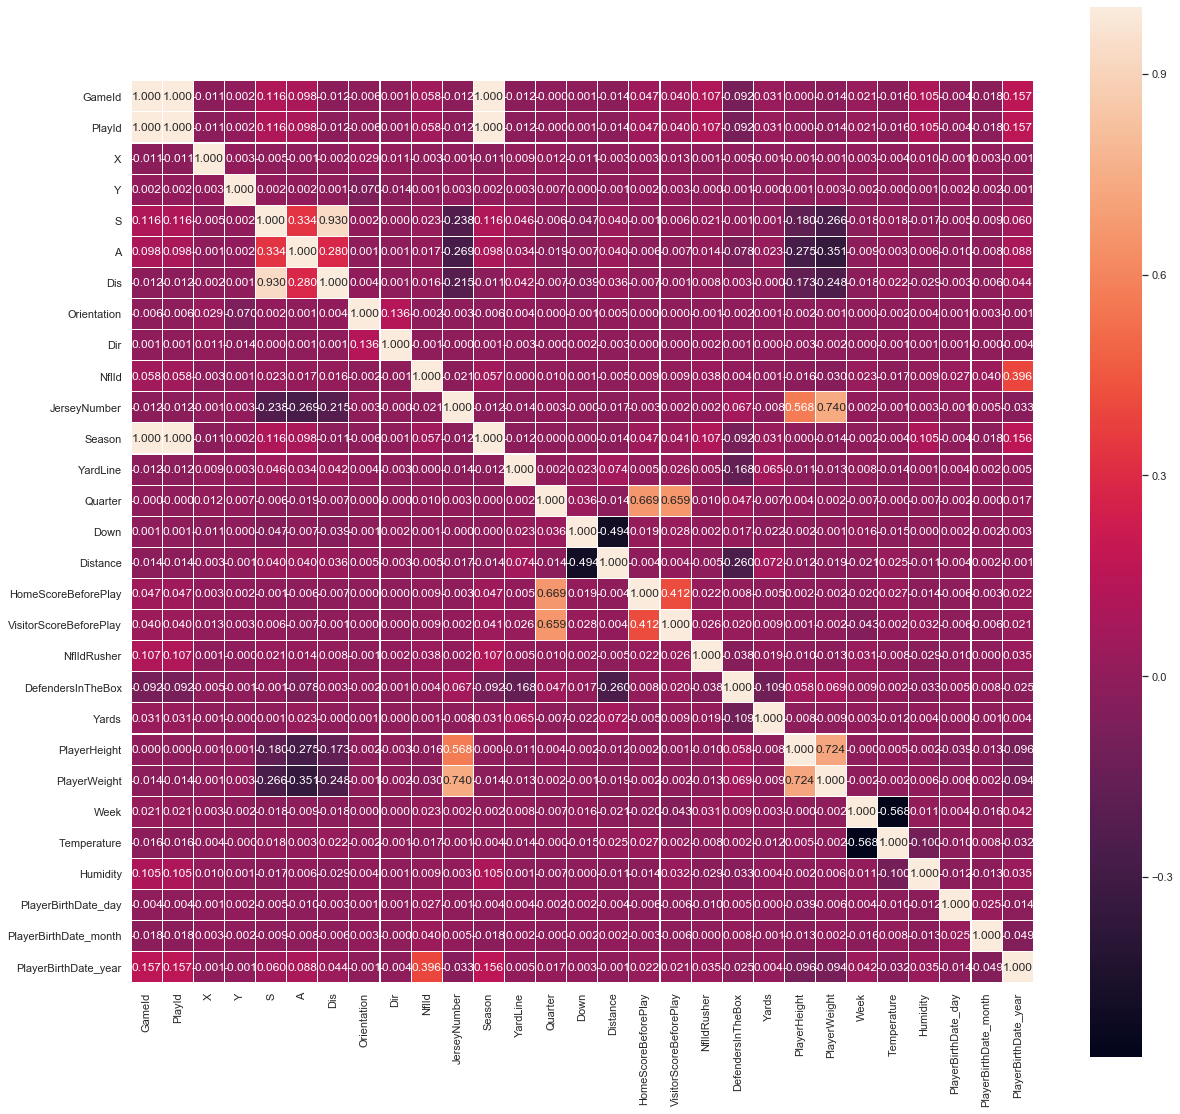

In [148]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=True)

# Analisando todas as features do dataset
- Neste momento as analises serao com base em um novo dataset
- Esse dataset será com base no jogador que está jogando
- Essa analise foi identificada depois de verificar as features NflId e NflIdRusher
- Essas duas features sao vinculadas, onde é possivel obter o jogador participante da jogada e obter a quantidade de jardas ganhas ou perdidas

In [149]:
# a unique play identifier
# Sao 22 registros por jogada
# Pois sao 11 jogadores do time da casa e 11 jogadores do time visitante
train['PlayId'].value_counts().head()

20181007011551    22
20181213001041    22
20181111021012    22
20180930094139    22
20181028023394    22
Name: PlayId, dtype: int64

In [150]:
# Vinculando o NFLid e NFLidRusher
train_jog = train[train['NflId'] == train['NflIdRusher']]
print(train_jog.shape)

(23171, 52)


In [151]:
# Quando realizado a ligacao entre NflId e NflIdRusher
# Verifica que agora cada jogada tem um unico registro
# e unica jarda obtida
train_jog['PlayId'].value_counts().head()

20181216093906    1
20171217034111    1
20171217052256    1
20180923120507    1
20171030002555    1
Name: PlayId, dtype: int64

In [152]:
# Exemplo mostrando a sequencia das jogadas de um jogo que contabilizou mudanca de jardas (+ ou -)
# É possivel identificar que essa sequencia é crescente, e registrada em PlayId
# Usando o filtro de apenas uma partida de 2017
train_jog[train_jog['GameId'] == 2017090700].head(10)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,PlayerBirthDate_day,PlayerBirthDate_month,PlayerBirthDate_year
391,2017090700,20170907001376,home,27.02,19.57,6.28,2.93,0.62,55.04,155.43,2539663,Mike Gillislee,35,2017,22,2,12:49:00,NE,2,6,NE,10,7,2539663,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",right,2017-09-08T01:34:25.000Z,2017-09-08T01:34:24.000Z,4,180.3,95.254398,1990-11-01,Florida,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,1,11,1990
367,2017090700,20170907001355,home,24.18,29.83,7.31,1.59,0.74,74.58,184.05,2530515,Chris Hogan,15,2017,18,2,13:17:00,NE,1,10,NE,10,7,2530515,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,"3 DL, 4 LB, 4 DB",right,2017-09-08T01:33:57.000Z,2017-09-08T01:33:56.000Z,4,185.4,95.254398,1987-10-24,Monmouth (N.J.),WR,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,24,10,1987
412,2017090700,20170907001443,home,51.60,30.02,6.94,3.35,0.72,93.08,187.65,2530515,Chris Hogan,15,2017,48,2,11:23:00,NE,2,10,NE,10,7,2530515,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",right,2017-09-08T01:36:31.000Z,2017-09-08T01:36:29.000Z,0,185.4,95.254398,1987-10-24,Monmouth (N.J.),WR,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,24,10,1987
1132,2017090700,20170907004721,away,74.09,22.88,3.33,2.25,0.35,313.31,60.80,2557917,Kareem Hunt,27,2017,33,4,02:32:00,KC,3,1,NE,27,42,2557917,I_FORM,"2 RB, 1 TE, 2 WR",8.0,"5 DL, 2 LB, 4 DB",right,2017-09-08T04:12:30.000Z,2017-09-08T04:12:28.000Z,3,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,6,8,1995
1044,2017090700,20170907004465,away,24.80,30.22,4.99,3.75,0.45,350.12,7.50,2557917,Kareem Hunt,27,2017,21,4,04:15:00,KC,1,10,KC,27,35,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",9.0,"5 DL, 2 LB, 4 DB",right,2017-09-08T04:03:55.000Z,2017-09-08T04:03:54.000Z,58,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,6,8,1995
1022,2017090700,20170907004314,away,100.45,20.38,5.97,2.94,0.61,6.80,171.47,2557917,Kareem Hunt,27,2017,4,4,05:19:00,KC,1,4,NE,27,28,2557917,SHOTGUN,"1 RB, 1 TE, 3 WR",8.0,"4 DL, 1 LB, 6 DB",right,2017-09-08T03:51:37.000Z,2017-09-08T03:51:35.000Z,4,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,6,8,1995
1110,2017090700,20170907004660,away,65.42,20.58,4.96,2.24,0.56,35.58,139.64,2557917,Kareem Hunt,27,2017,40,4,02:37:00,KC,2,8,NE,27,42,2557917,I_FORM,"2 RB, 2 TE, 1 WR",8.0,"5 DL, 2 LB, 4 DB",right,2017-09-08T04:10:58.000Z,2017-09-08T04:10:57.000Z,2,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,6,8,1995
1088,2017090700,20170907004622,away,62.55,26.40,4.83,2.05,0.54,42.26,143.07,2557917,Kareem Hunt,27,2017,42,4,02:44:00,KC,1,10,NE,27,42,2557917,I_FORM,"2 RB, 2 TE, 1 WR",9.0,"5 DL, 2 LB, 4 DB",right,2017-09-08T04:10:08.000Z,2017-09-08T04:10:07.000Z,2,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,6,8,1995
824,2017090700,20170907003261,away,103.81,30.67,1.96,3.33,0.20,188.05,280.23,2557917,Kareem Hunt,27,2017,11,3,04:21:00,KC,2,12,KC,24,21,2557917,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 1 LB, 6 DB",left,2017-09-08T03:09:15.000Z,2017-09-08T03:09:14.000Z,1,180.3,97.975952,1995-08-06,Toledo,RB,NE,KC,1,Gill

### Analisando a variavel target 'Yards'
- Extraindo os dados estatisticos, verifica a distribuição está entre -14 à 99
- Isso significa que em algumas jogadas existe um ganho de jardas e em outras perda de jardas
- Metade dos registros estao em 3 jardas ganhas

In [153]:
# Descricao: o número de jardas ganha na jogada (variavel a ser prevista)
train_jog['Yards'].describe()

count    23171.000000
mean         4.212334
std          6.436300
min        -14.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: Yards, dtype: float64

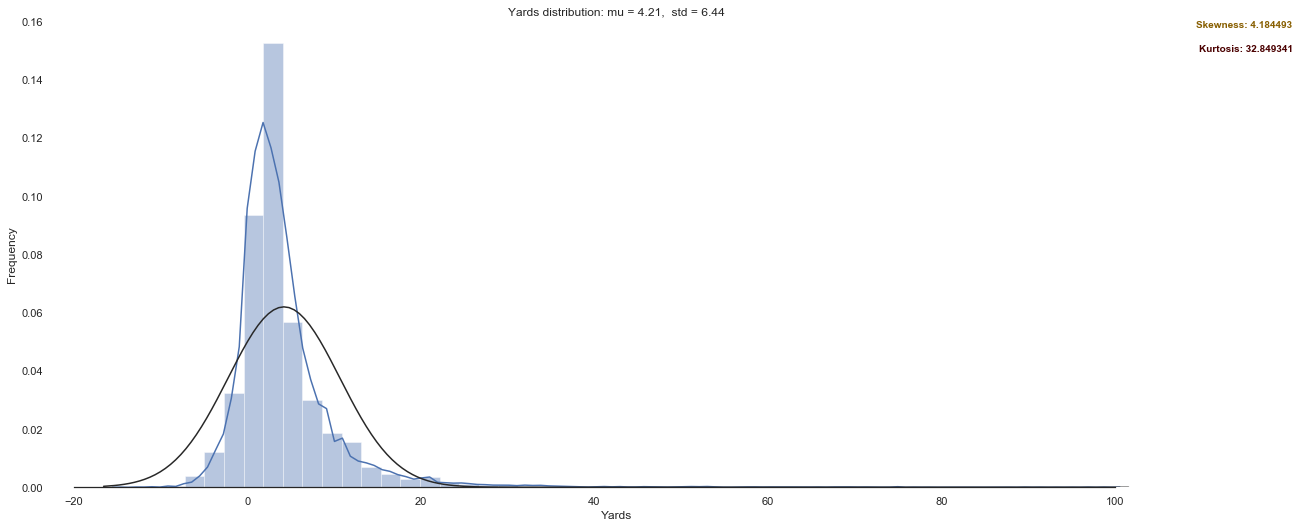

In [154]:
# Analisando a variavel target 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(18, 8))

# Fit a normal distribution
mu, std = norm.fit(train_jog["Yards"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train_jog["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train_jog["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train_jog["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

### Analisando as variaveis do JOGADOR
- **PlayerHeight:** altura do jogador no formato feet-inches
- **PlayerWeight:** peso do jogador no formato lbs
- **PlayerBirthDate:** data de nascimento do jogador
- **PlayerCollegeName:** faculdade que o jogador frequentou
- **Position:** posição principal do jogador
- **JerseyNumber:** 
   - Refere se aos números do uniformes dos jogadores que vai de 1 a 99. Atacantes usam de  50 a 79 e nao tem permissao por exemplo para manipular uma jogada de scrimmage a não ser que reportem ao árbitro que estao jogando fora de posição

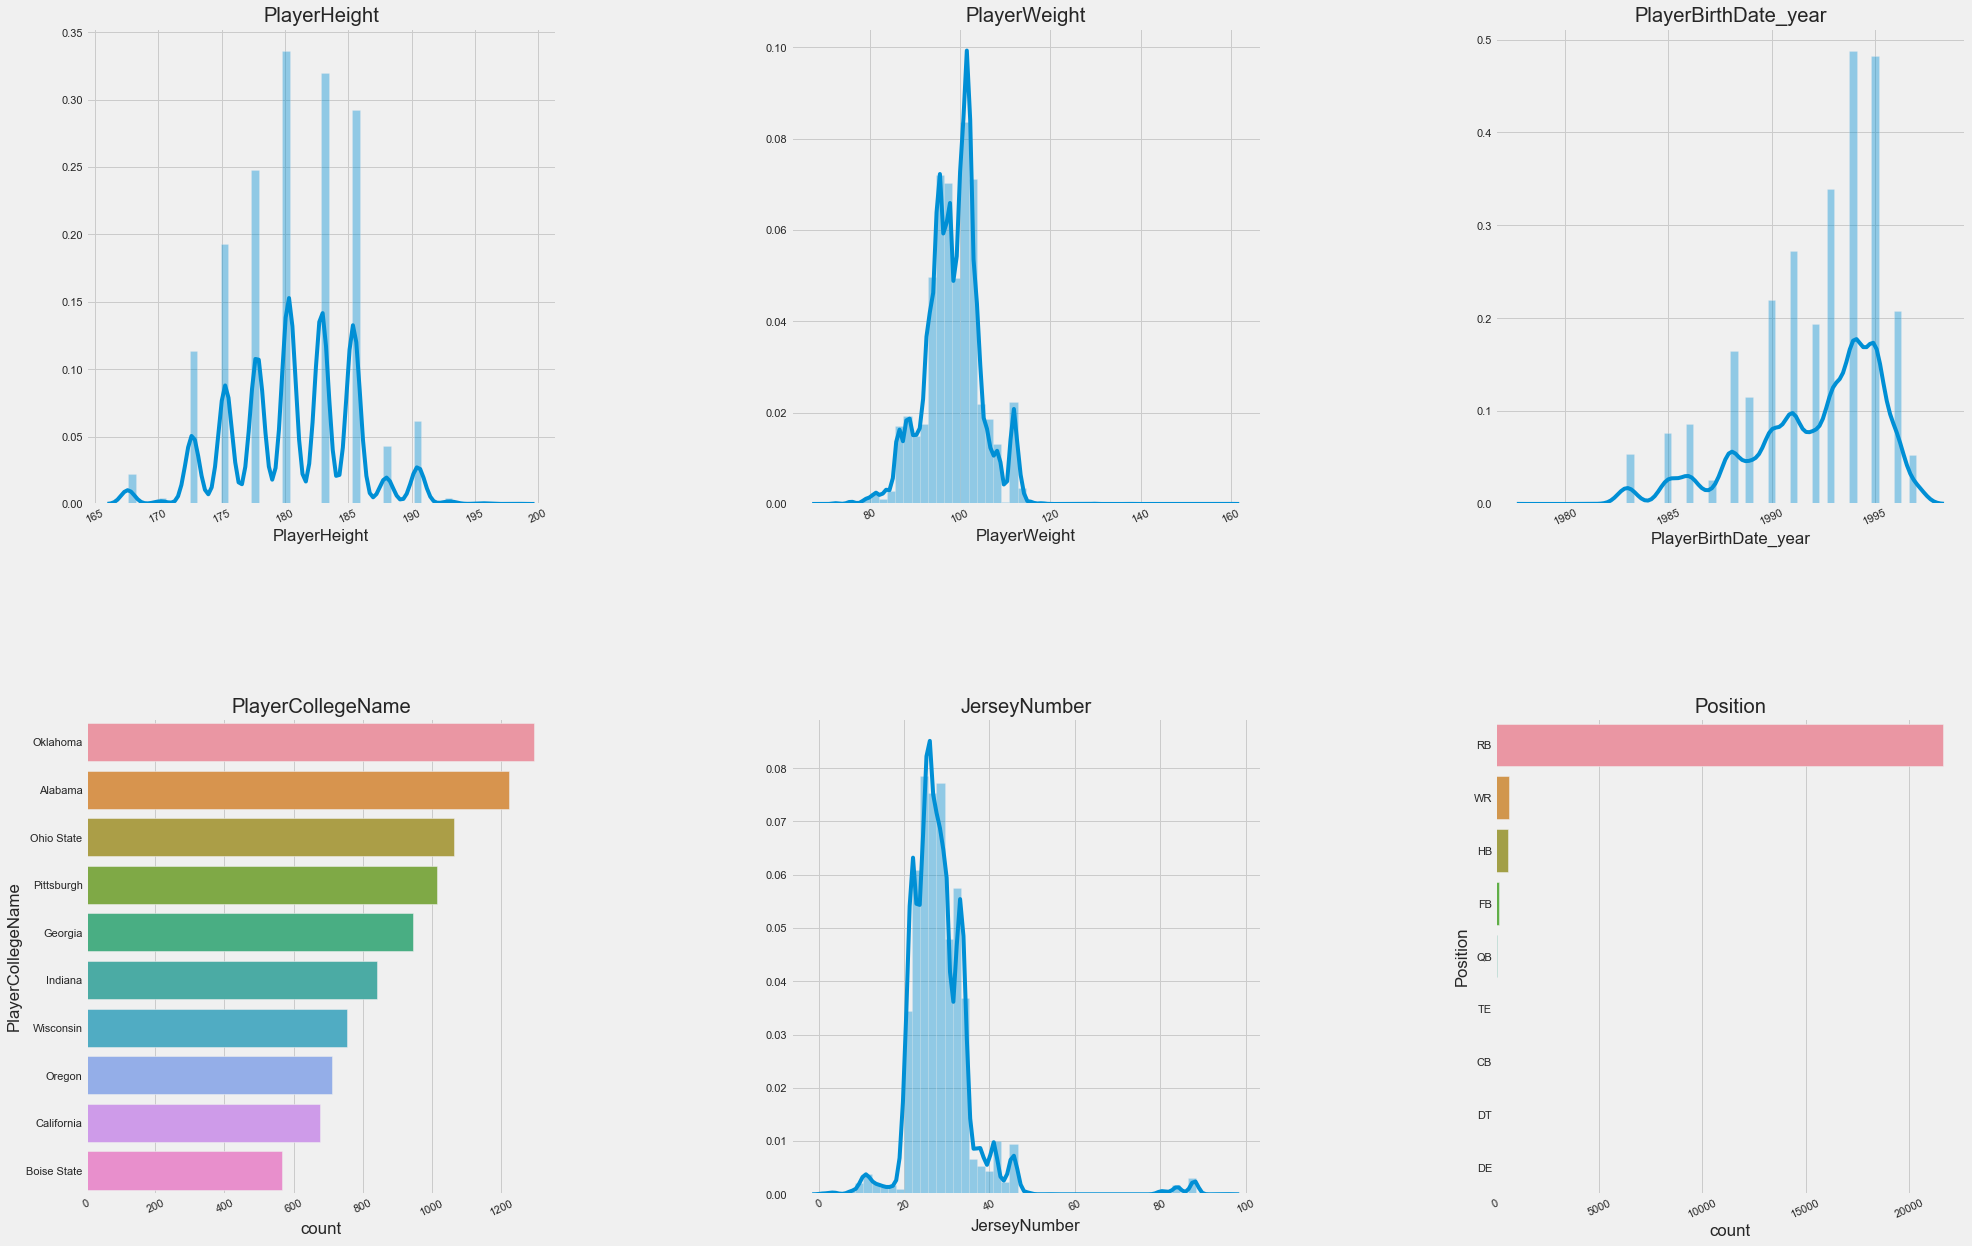

In [258]:
# Visualizando o grafico de distribuicao para cada feature do jogador
columns_to_plot = ['PlayerHeight', 'PlayerWeight', 'PlayerBirthDate_year', 'PlayerCollegeName', 'JerseyNumber', 'Position']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

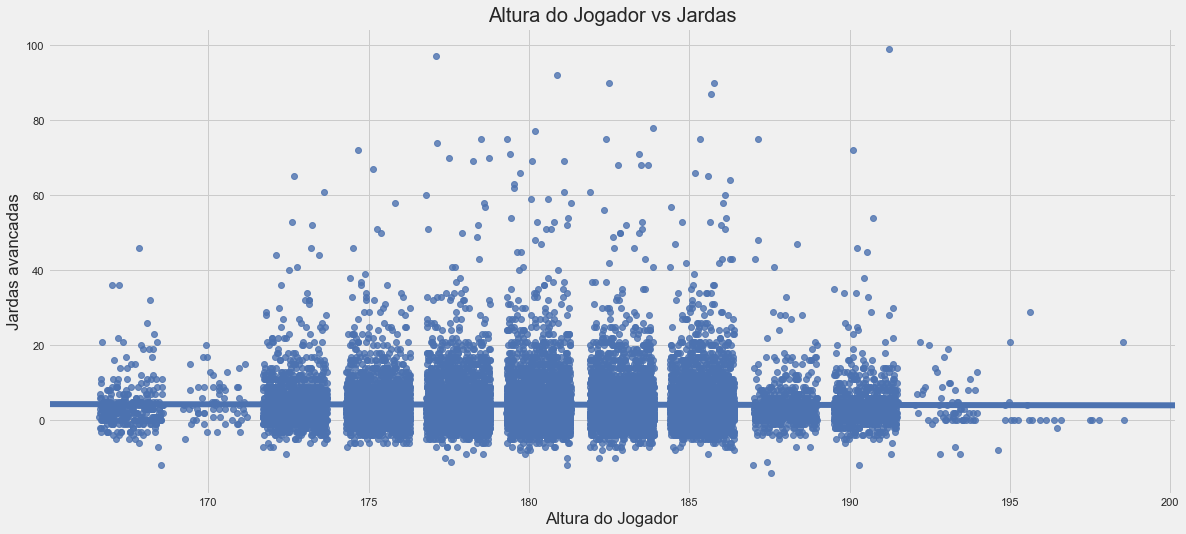

In [156]:
# Exibe o grafico de scatterPlot com a relacao entre Altura do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Altura do Jogador')
plt.ylabel('Jardas avancadas')
plt.title('Altura do Jogador vs Jardas', fontsize=20)
plt.show()

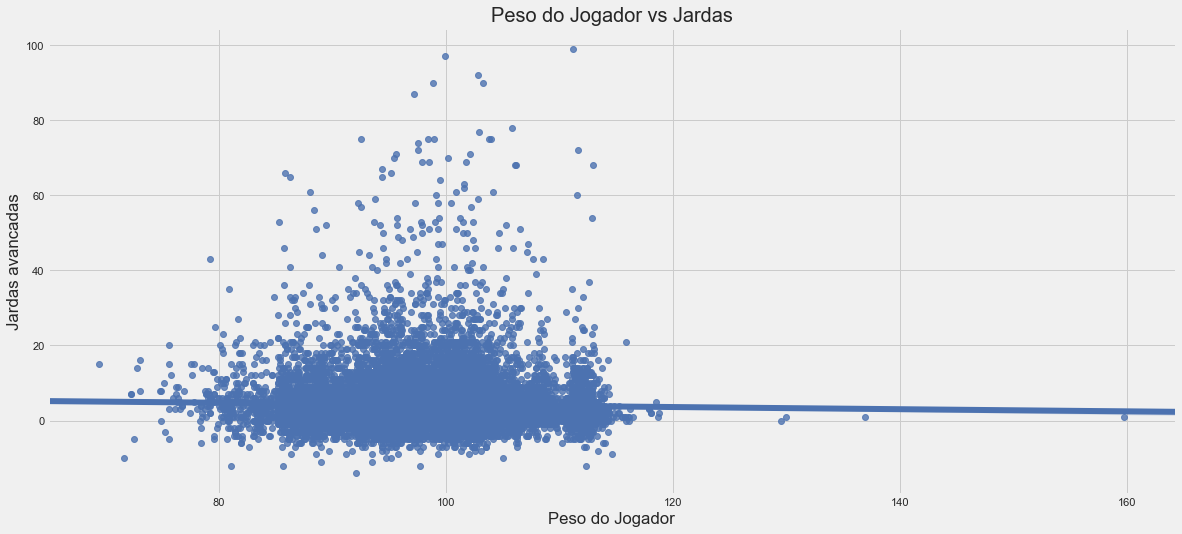

In [157]:
# Exibe o grafico de scatterPlot com a relacao entre Peso do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerWeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Peso do Jogador')
plt.ylabel('Jardas avancadas')
plt.title('Peso do Jogador vs Jardas', fontsize=20)
plt.show()

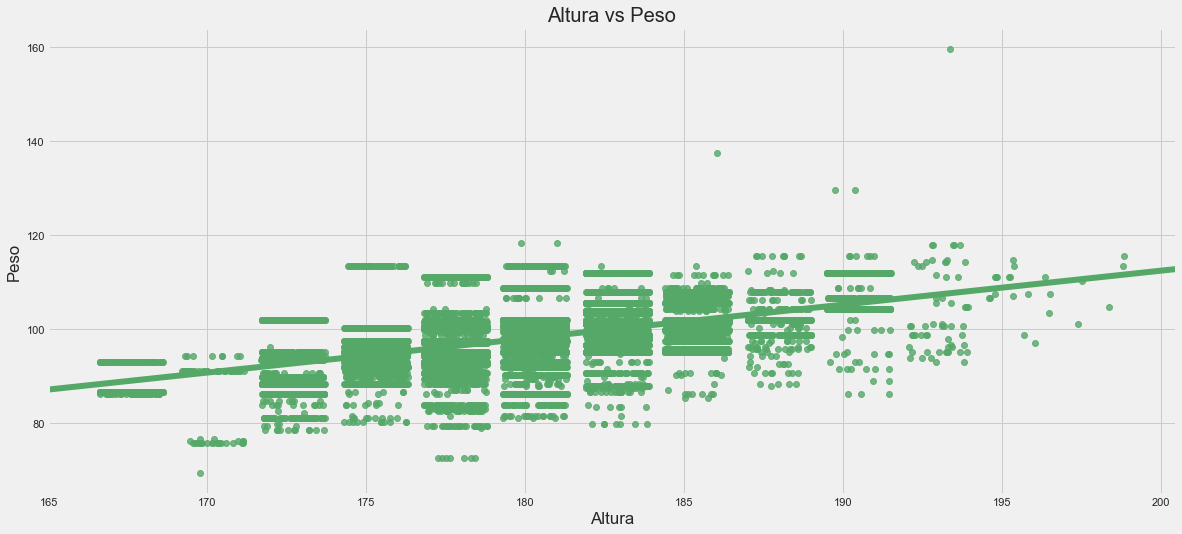

In [158]:
# Exibe o grafico de scatterPlot com a relacao entre Altura e Peso do jogador
# É uma relacao de regressao positiva, onde quanto maais alto, mais pesado o jogador
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='PlayerWeight', data=train_jog, color='g', x_jitter=1)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Altura vs Peso', fontsize=20)
plt.show()

In [159]:
# Verificando jogadores acima de 140kg
# Encontrado apenas 1 jogador: Akiem Hicks
# A imagem abaixo mostra este jogador
train_jog[train_jog['PlayerWeight'] >= 140.00].head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,PlayerBirthDate_day,PlayerBirthDate_month,PlayerBirthDate_year
439473,2018120207,20181202071749,away,108.4,28.91,3.41,0.23,0.36,133.32,105.63,2533433,Akiem Hicks,96,2018,1,2,03:43:00,CHI,4,1,NYG,7,7,2533433,JUMBO,"6 OL, 1 RB, 1 TE, 0 WR,2 DL",10.0,"5 DL, 3 LB, 3 DB",right,2018-12-02T19:10:15.000Z,2018-12-02T19:10:14.000Z,1,193.0,159.664514,1989-11-16,"Regina, Can.",DT,NYG,CHI,13,MetLife Stadium,"East Rutherford, NJ",unknown,UBU Speed Series-S5-M,Cloudy,52.0,92.0,3,NNW,16,11,1989


In [160]:
from IPython.display import Image
Image(url = '../images/Akiem_Hicks.jpg',width=400,height=400)

In [161]:
# Verificando jogadores com menos de 70kg
# Encontrado apenas 1 jogador: JoJo Natson
# A imagem abaixo mostra este jogador
train_jog[train_jog['PlayerWeight'] <= 70.00].head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,PlayerBirthDate_day,PlayerBirthDate_month,PlayerBirthDate_year
220780,2017121705,20171217052256,away,21.63,34.17,7.22,3.57,0.76,107.8,200.16,2558905,JoJo Natson,87,2017,18,3,14:50:00,NYJ,2,10,NYJ,17,10,2558905,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,"4 DL, 2 LB, 5 DB",right,2017-12-17T19:47:45.000Z,2017-12-17T19:47:43.000Z,15,170.2,69.399633,1994-02-01,Akron,WR,NO,NYJ,15,Mercedes-Benz SuperDome,"New Orleans, LA",indoor_closed,UBU Speed Series-S5-M,Rain,67.0,97.0,4,WSW,1,2,1994


In [162]:
from IPython.display import Image
Image(url = '../images/Jojo_Natson.jpg',width=400,height=400)

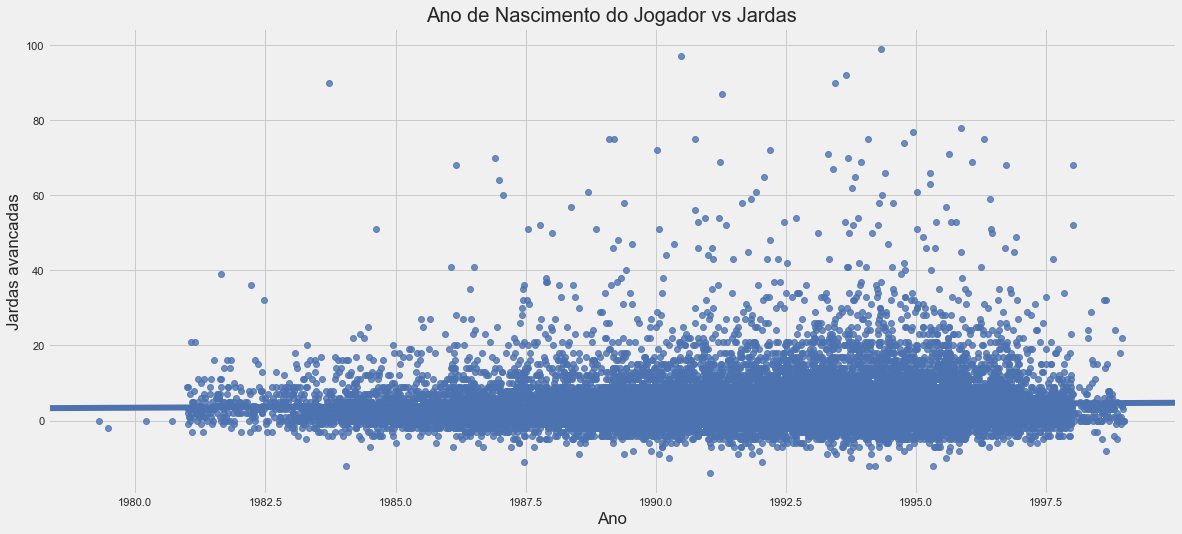

In [163]:
# Exibe o grafico de scatterPlot com a relacao entre Ano de nascimento do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerBirthDate_year', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Ano')
plt.ylabel('Jardas avancadas')
plt.title('Ano de Nascimento do Jogador vs Jardas', fontsize=20)
plt.show()

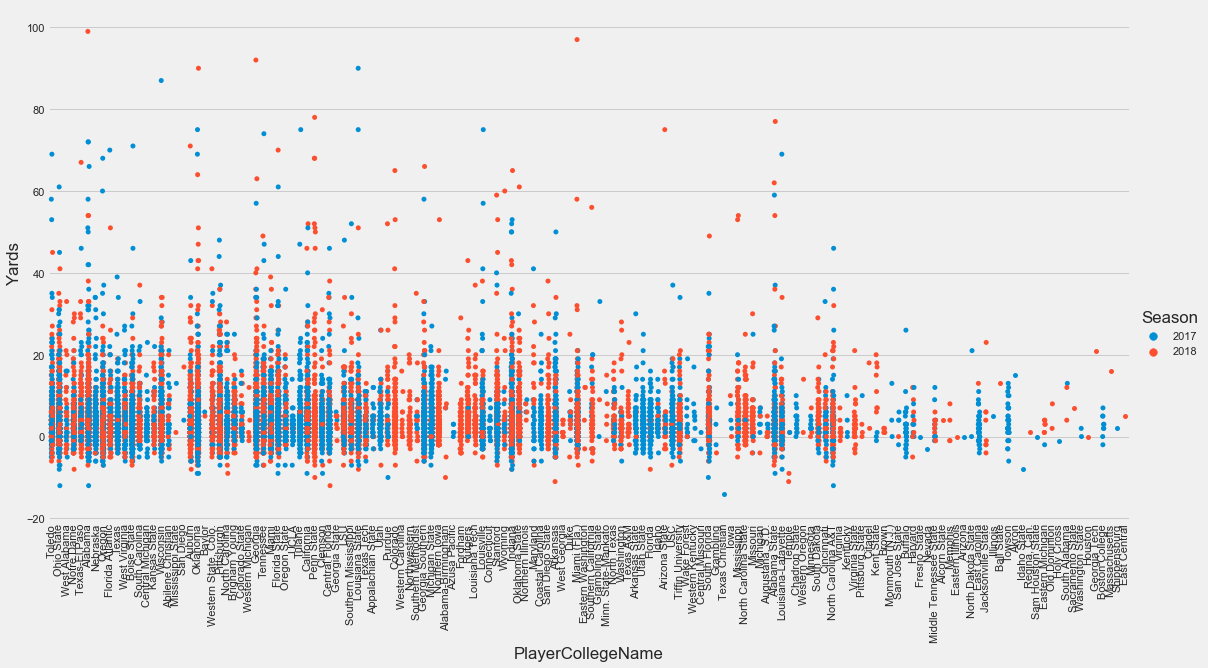

In [262]:
# Exibe o grafico de catPlot com a relacao entre o clima e Jardas
g = sns.catplot(x='PlayerCollegeName', y='Yards', hue='Season', data=train_jog, height=8, aspect=2)
g.set_xticklabels(rotation=90)

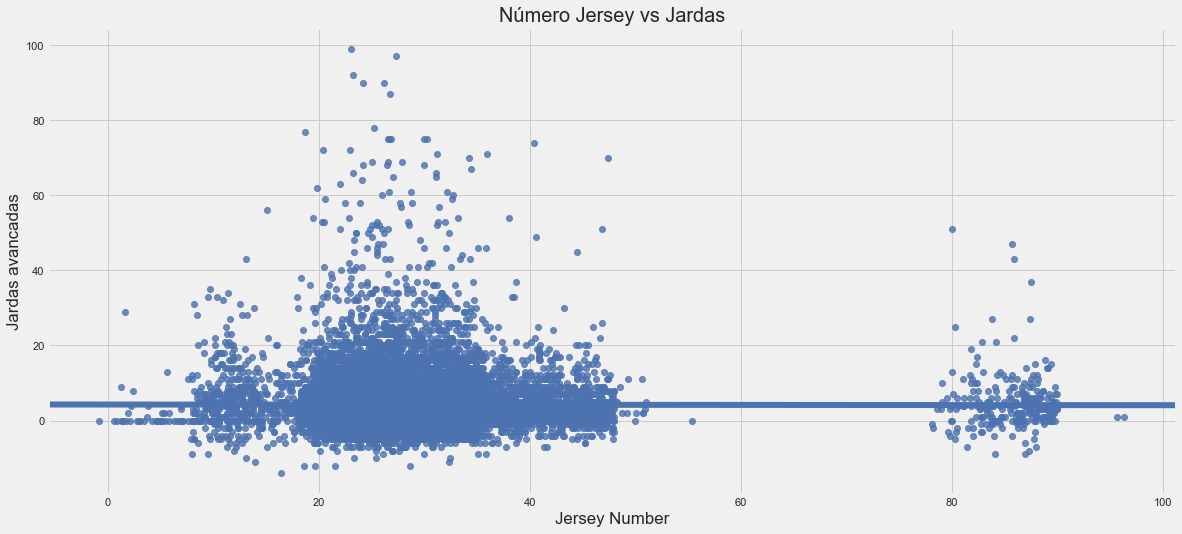

In [264]:
# Exibe o grafico de scatterPlot com a relacao entre JerseyNumber e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='JerseyNumber', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Jersey Number')
plt.ylabel('Jardas avancadas')
plt.title('Número Jersey vs Jardas', fontsize=20)
plt.show()

In [260]:
train_jog['Position'].value_counts()

RB    21628
WR      638
HB      616
FB      169
QB       77
TE       31
CB        9
DT        2
DE        1
Name: Position, dtype: int64

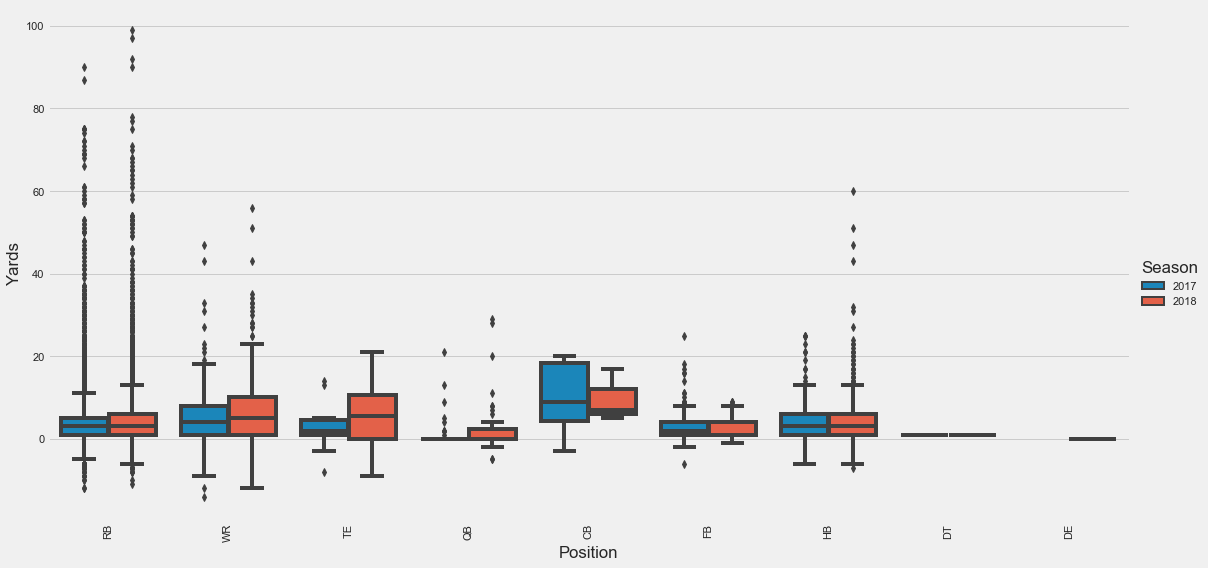

In [265]:
# Exibe o grafico de catPlot com a relacao entre o Posição Principal do Jogador e Jardas
g = sns.catplot(x='Position', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

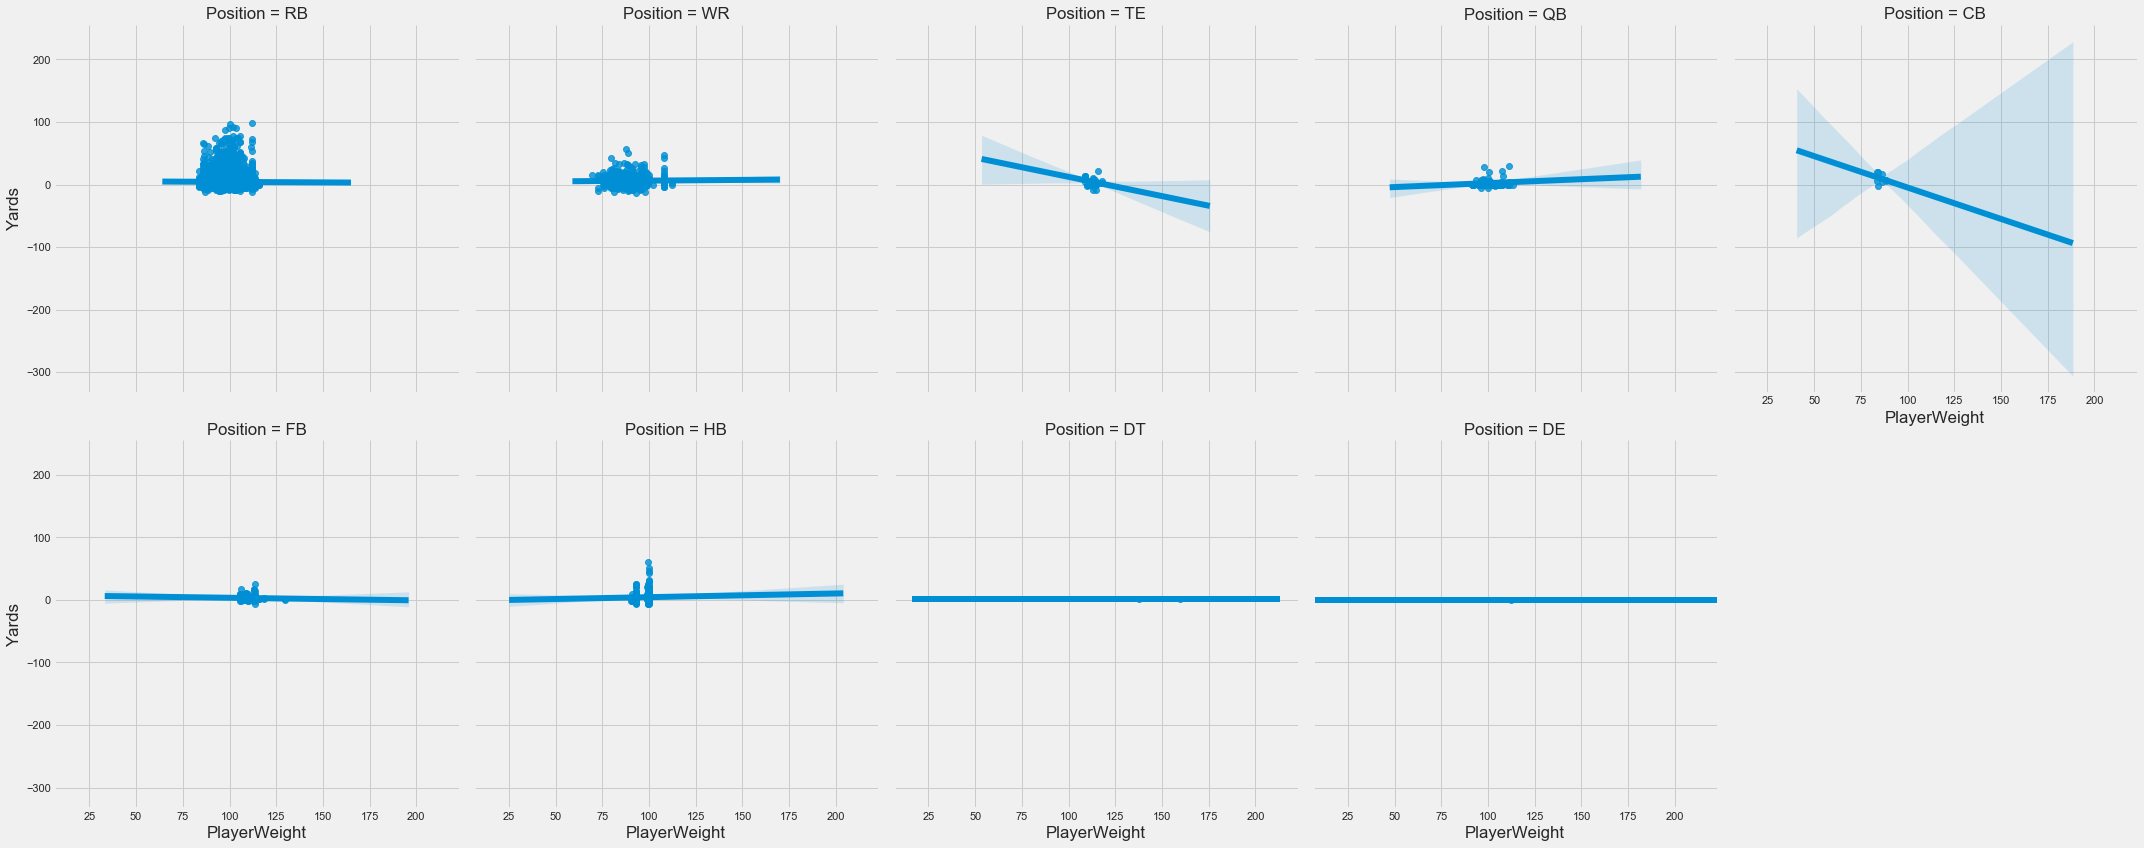

In [271]:
# Exibe o grafico linear com a relacao entre Peso, Posição e Jardas
g = sns.lmplot(x='PlayerWeight', y='Yards', data=train_jog, 
               x_jitter=.2, col="Position" , height=6, aspect=1, col_wrap=5)

### Analisando as variaveis gerais da PARTIDA
- **Season:** ano da temporada
- **Week:** semana do jogo
- **Team:** detalhes dos times: donos da casa ou visitante (home or away)
- **StadiumType:** nome do tipo do estádio de futebol americano
- **Stadium:** nome do estádio de futebol americano
- **Location:**: localização do estádio
- **Turf:** superfície do gramado do estádio
- **GameClock:** hora da partida
- **HomeTeamAbbr:** abreviação do time da casa
- **VisitorTeamAbbr:** abreviação do time visitante

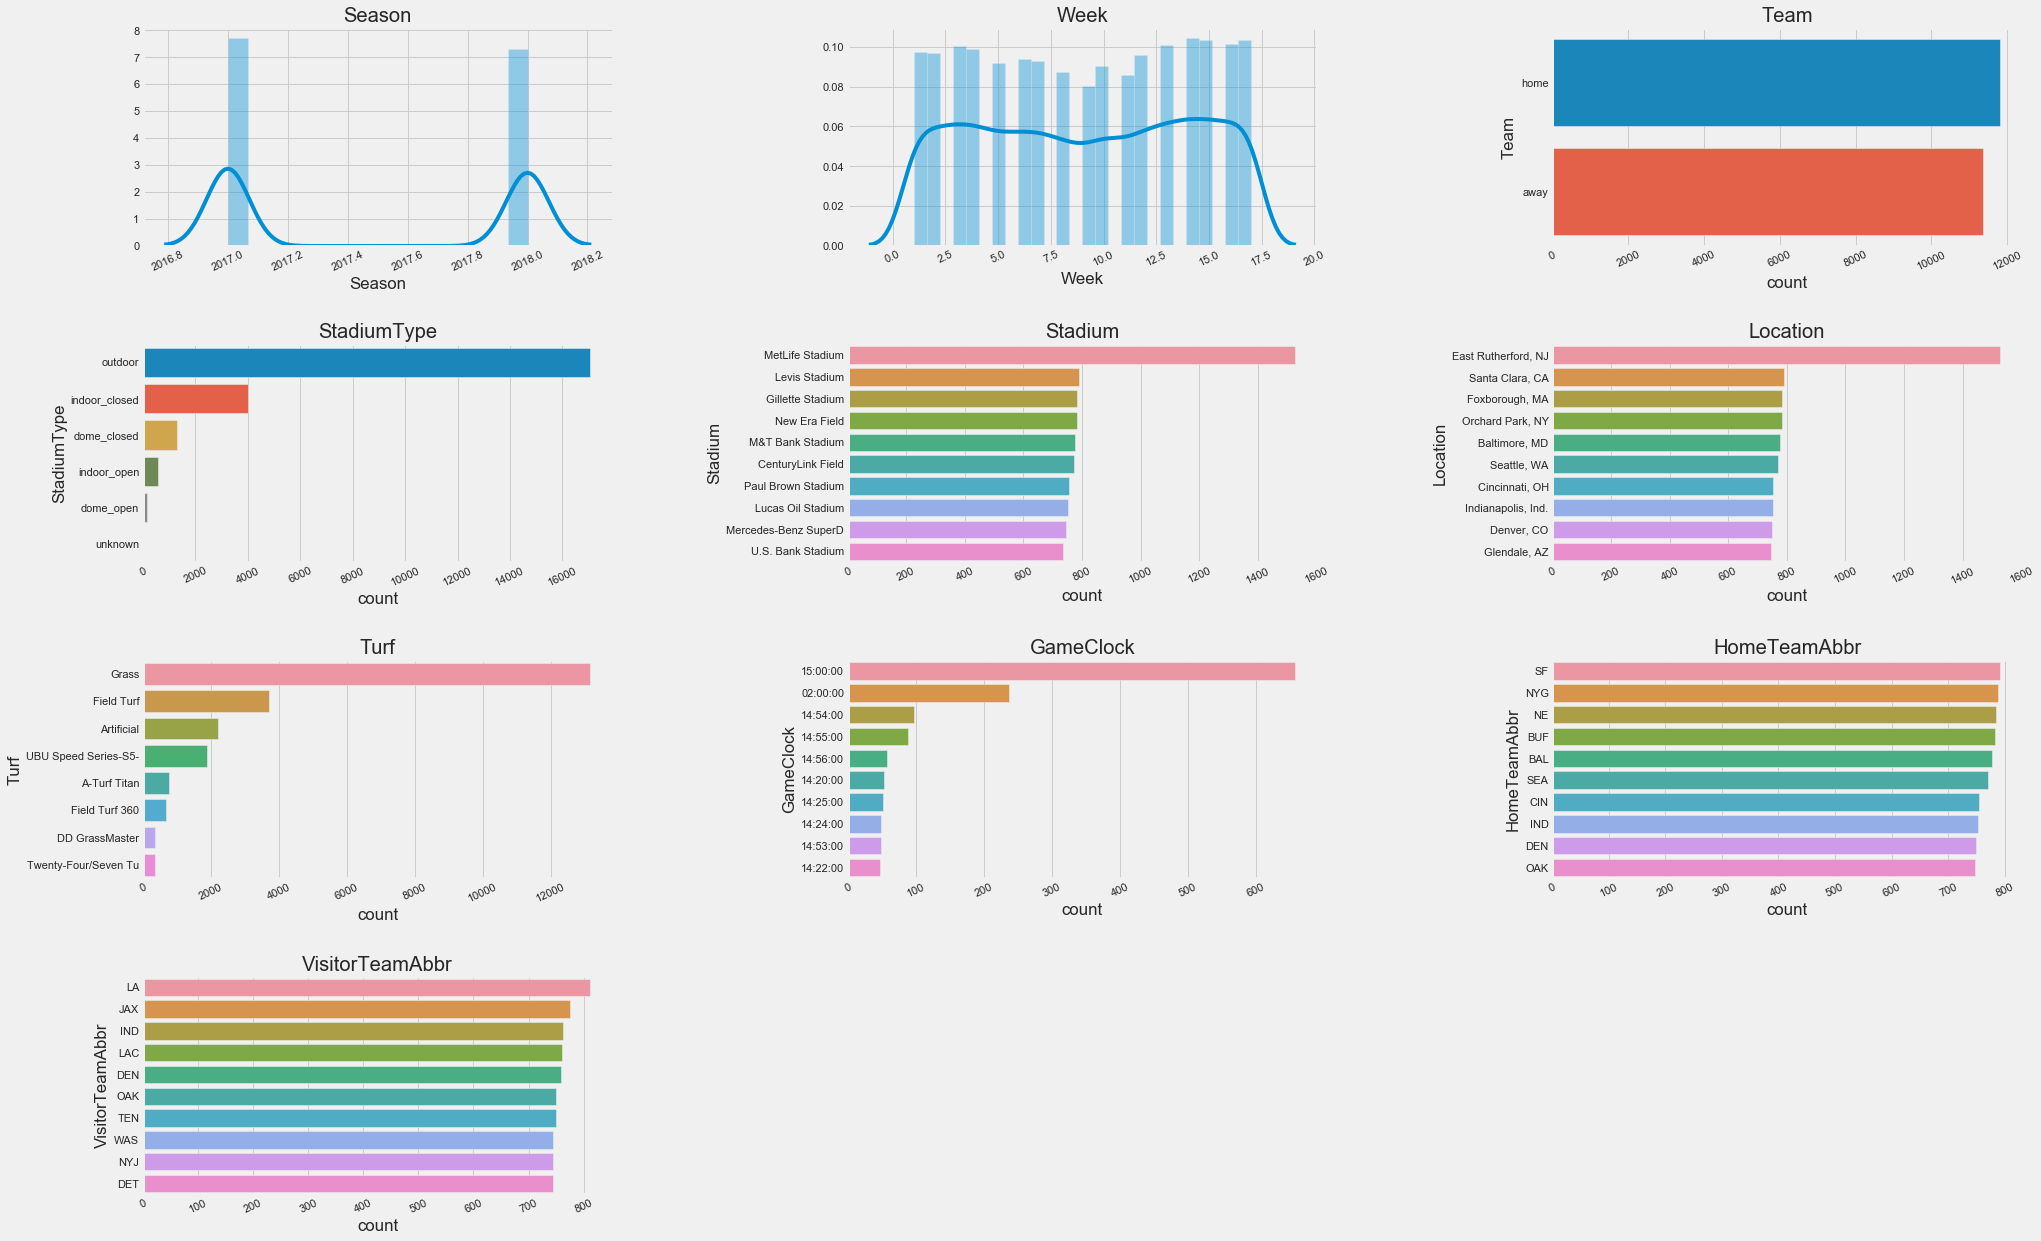

In [272]:
# Visualizando o grafico de distribuicao para cada feature do jogador
columns_to_plot = ['Season', 'Week', 'Team', 'StadiumType', 'Stadium', 
                   'Location', 'Turf', 'GameClock', 'HomeTeamAbbr', 'VisitorTeamAbbr']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

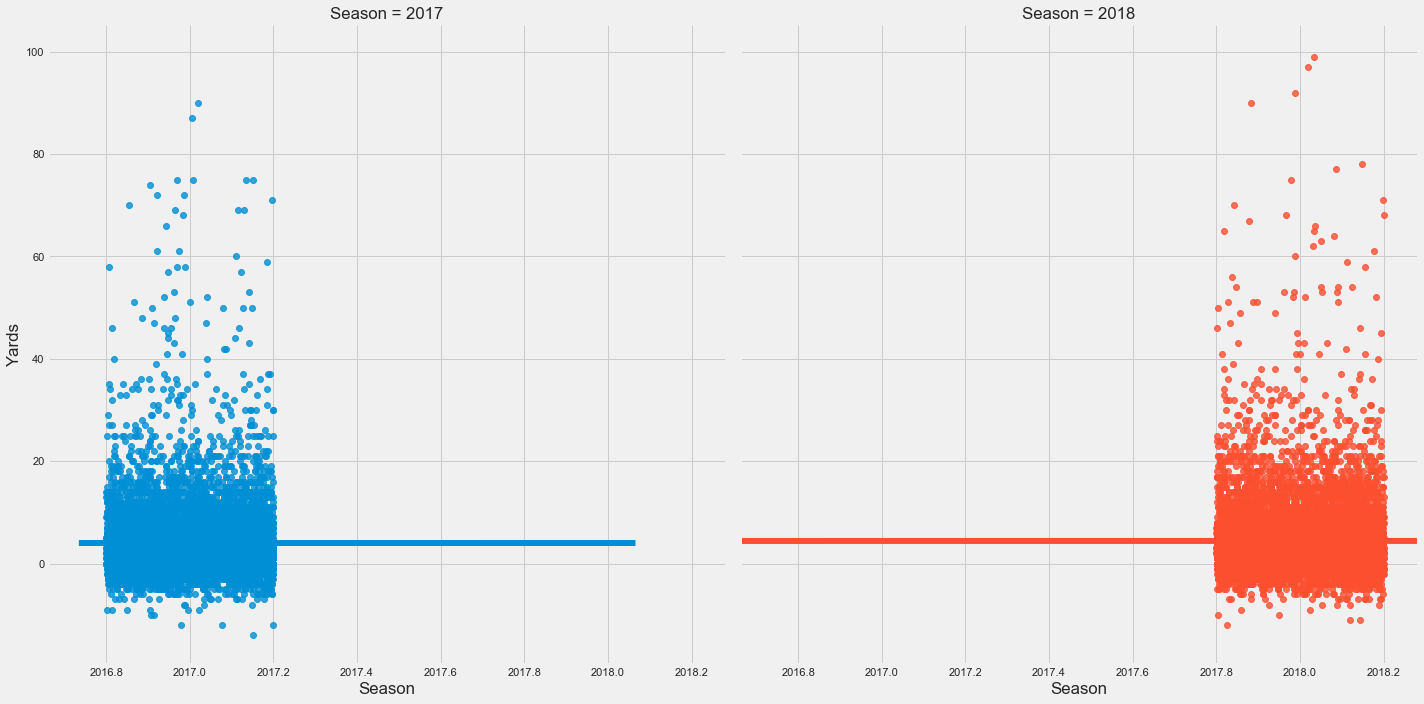

In [167]:
# Exibe o grafico linear com a relacao entre Season e Jardas
g = sns.lmplot(x='Season', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

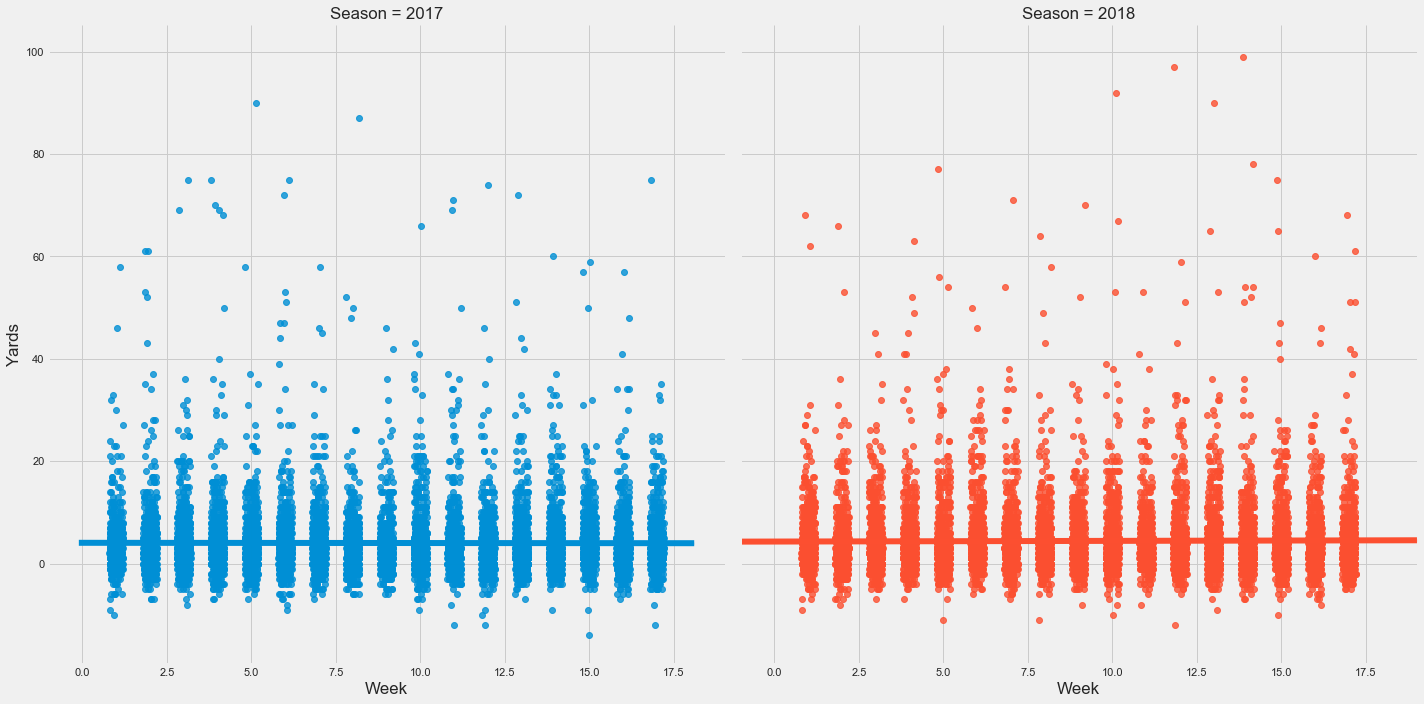

In [168]:
# Exibe o grafico linear com a relacao entre Season, Semana e Jardas
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

In [169]:
# Season tem uma correlação de 1.0 com GameId e PlayId. Exemplo abaixo com 2017 e 2018:
# GameId e PlayId contem o ano e mais algumas informacoes
# Parece ser o mes e o dia e mais um identificador
# Talvez seria necessario deixar a variavel GameId e PlayId somente com o indicador individual
tmp = train_jog.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017110509  20171105091234
            GameId          PlayId
Season                            
2018    2018120912  20181209120194


In [170]:
# Verificando quais sao os estadios que ficaram com tipo de estadio indefinido
# Sao tres estadios
# Vou dar uma olhada para saber se tem um tipo definido para eles
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE StadiumType = 'unknown'
        GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

,StadiumType,Stadium
0,unknown,MetLife Stadium
1,unknown,StubHub Center
2,unknown,TIAA Bank Field


In [171]:
# Para o MetLife Stadium
# Vou tentar encaixar o tipo indefinido
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium IN ('MetLife Stadium', 'StubHub Center', 'TIAA Bank Field')
        GROUP BY StadiumType, Stadium
        ORDER BY Stadium, StadiumType"""
ps.sqldf(q1, locals())

,StadiumType,Stadium
0,outdoor,MetLife Stadium
1,unknown,MetLife Stadium
2,unknown,StubHub Center
3,indoor_open,TIAA Bank Field
4,outdoor,TIAA Bank Field
5,unknown,TIAA Bank Field


In [172]:
# MetLife Stadium só tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/MetLife_Stadium.jpeg',width=400,height=400)

In [173]:
# StubHub Center so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/StubHub_center.jpg',width=400,height=400)

In [174]:
train_jog.loc[train_jog['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
train_jog.loc[train_jog['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [175]:
# Vista do estadio Mercedes_Benz onde tem varios tipos de modos de jogo
from IPython.display import Image
Image(url = '../images/Mercedes_Benz Stadium.jpg',width=400,height=400)

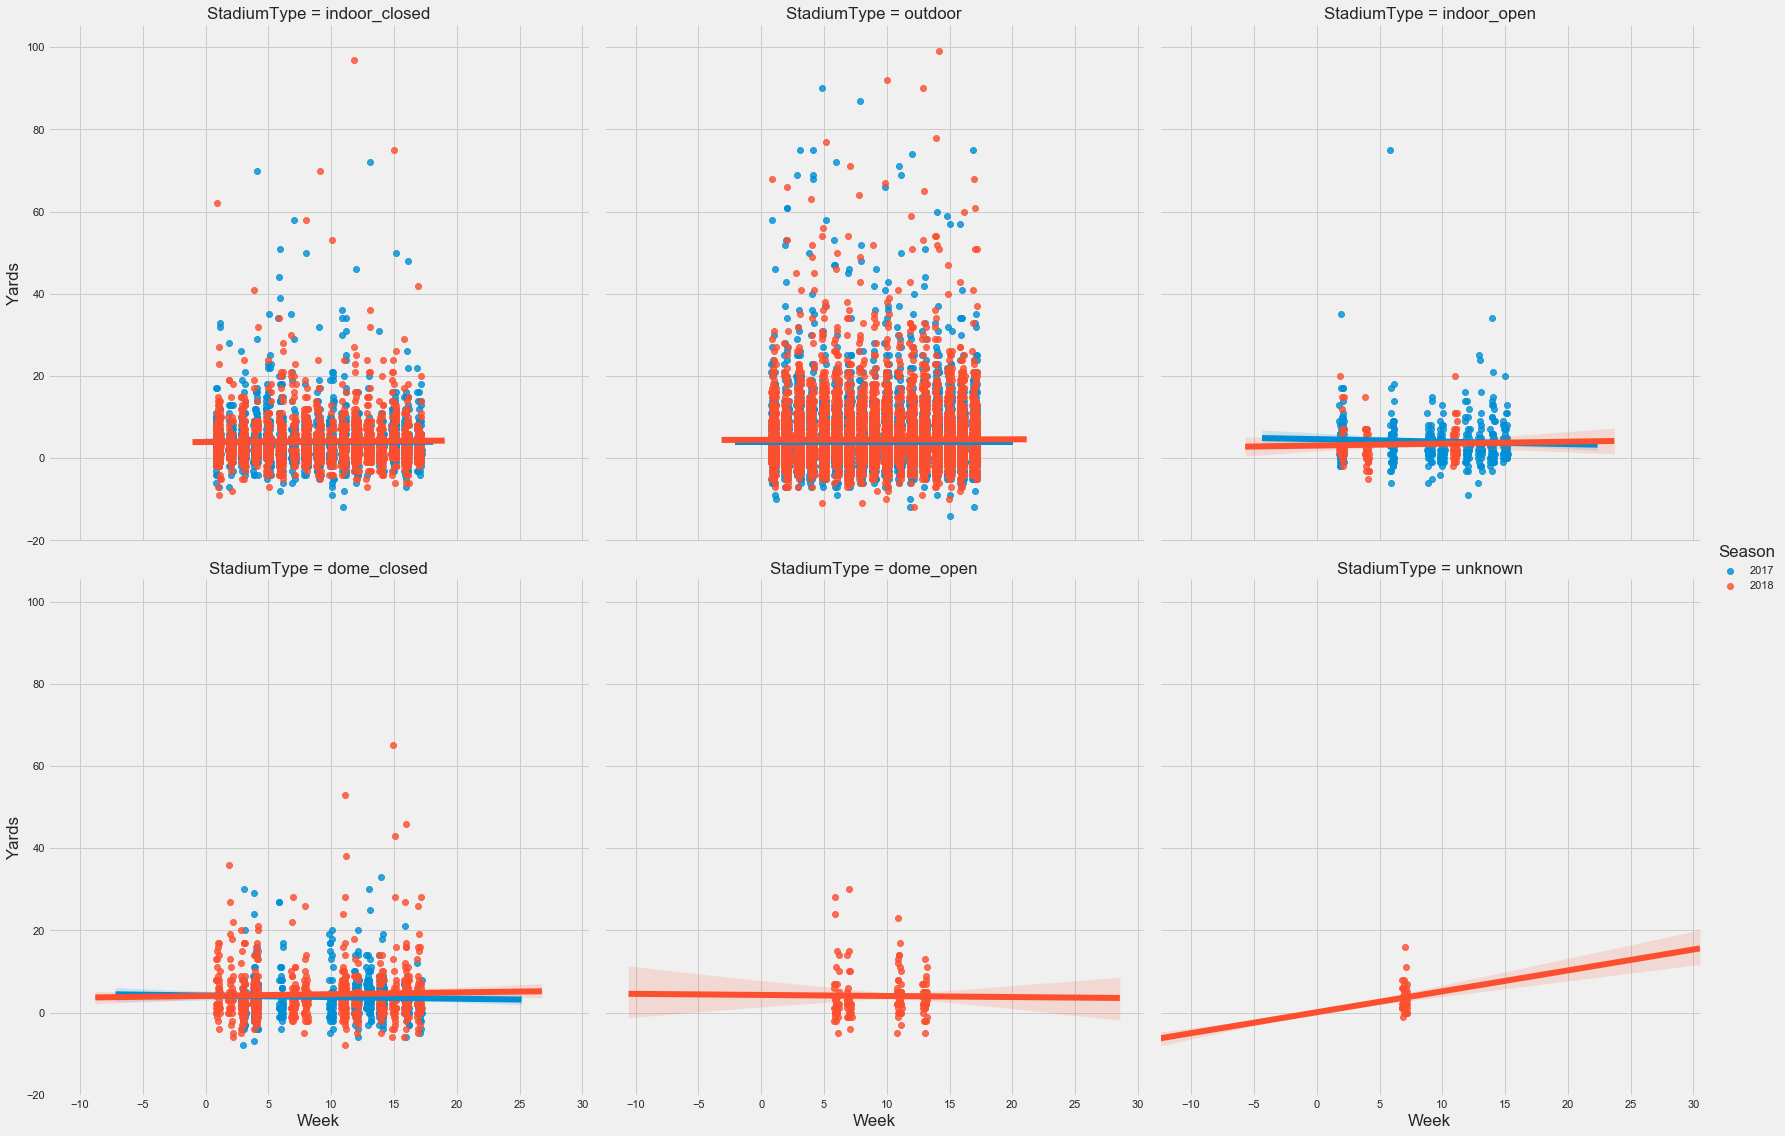

In [182]:
# Exibe o grafico linear com a relacao entre Semana, Tipo de Estadio, Temporada e Jardas
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, 
               x_jitter=.2, col="StadiumType" , height=8, col_wrap=3)

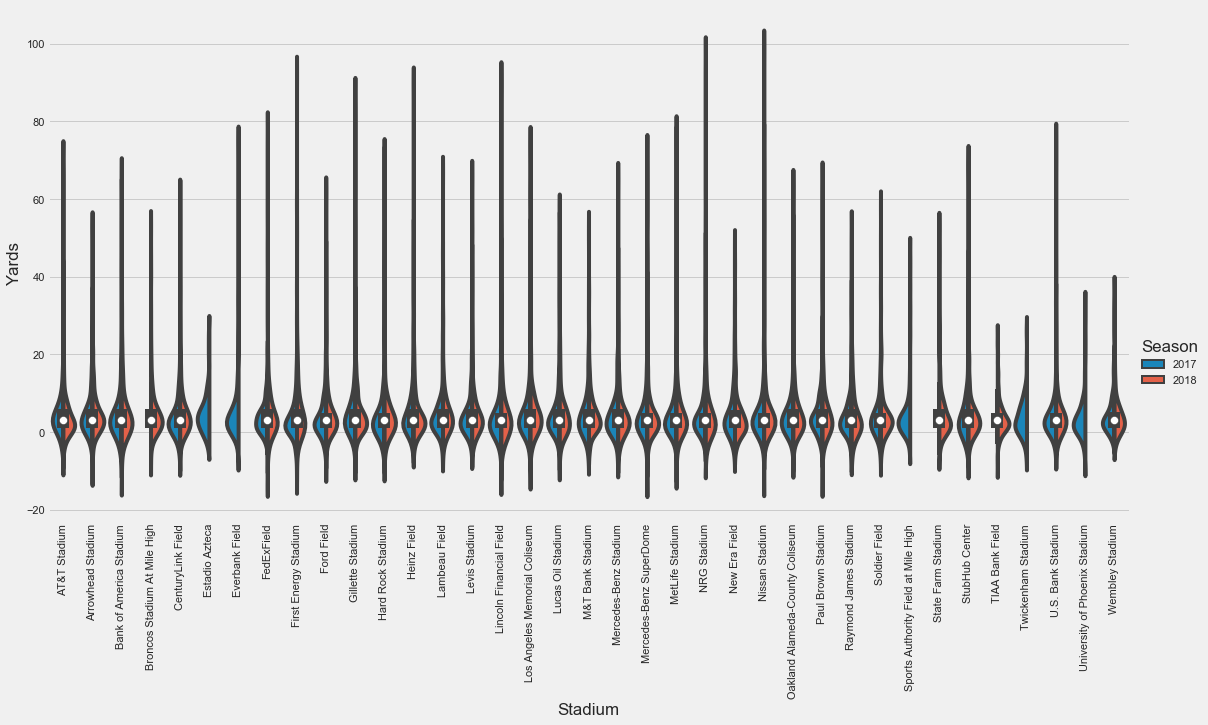

In [185]:
# Exibe o grafico de scatterPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Stadium', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

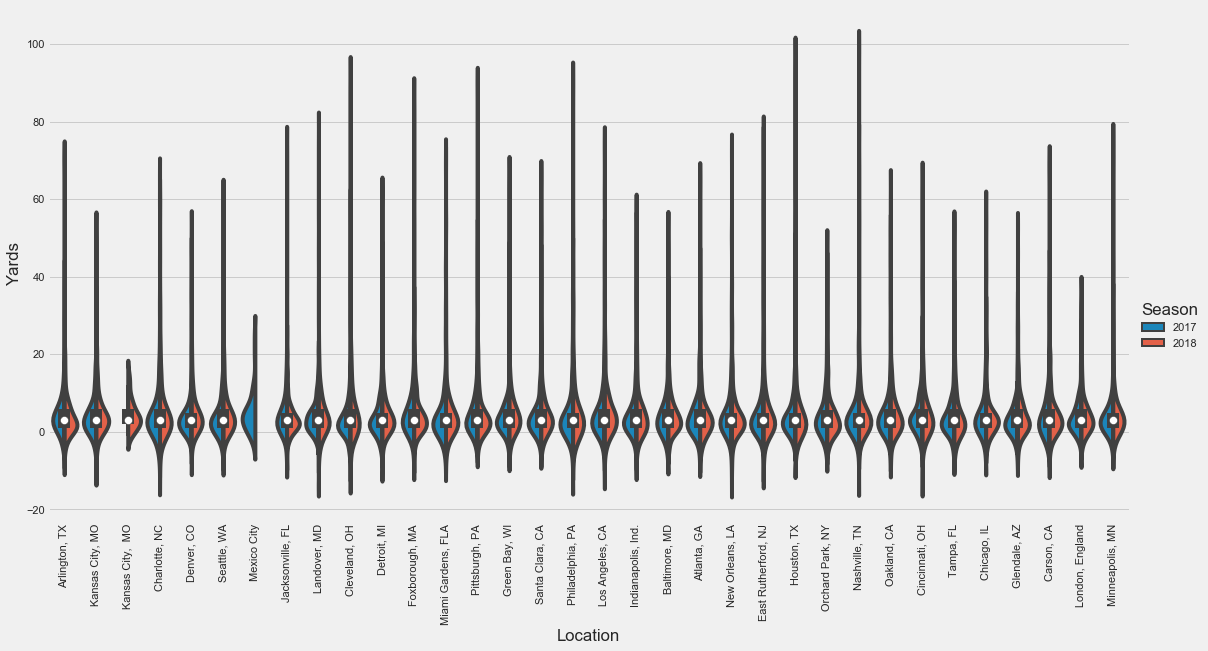

In [186]:
# Exibe o grafico de scatterPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Location', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

In [194]:
# description of the field surface
# Tipos de gramados dos estadios
train_jog.groupby('Turf').size()

Turf
A-Turf Titan                782
Artificial                 2199
DD GrassMaster              367
Field Turf                 3721
Field Turf 360              693
Grass                     13160
Twenty-Four/Seven Turf      365
UBU Speed Series-S5-M      1884
dtype: int64

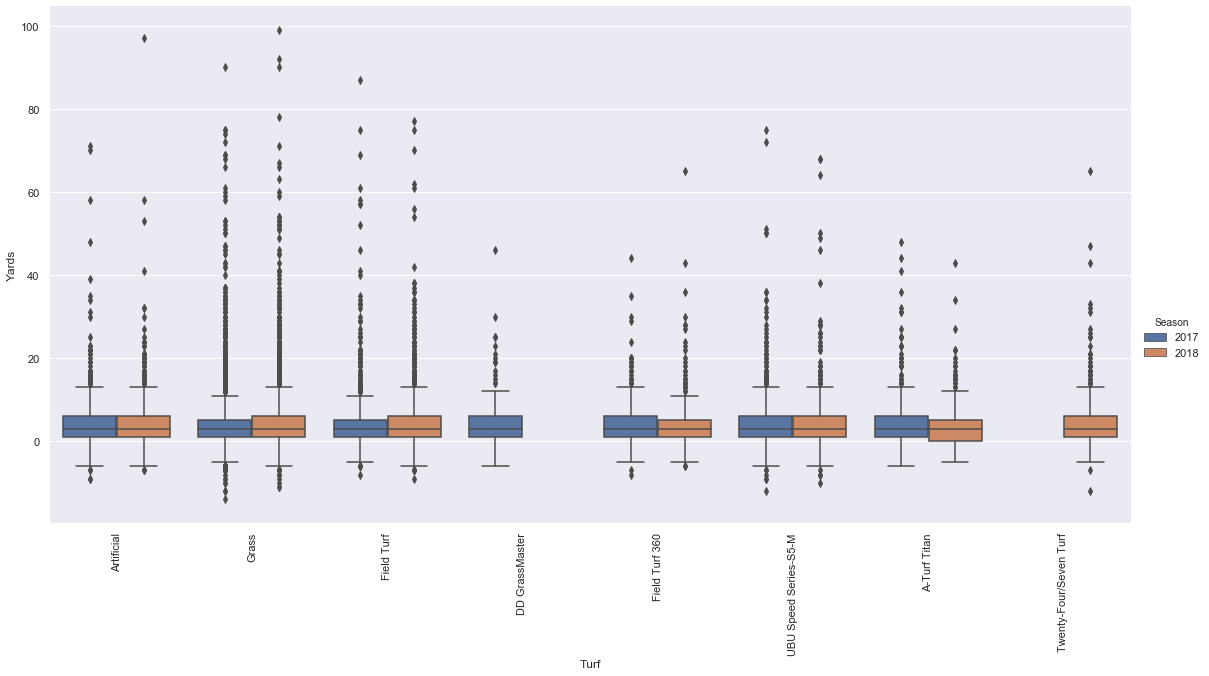

In [217]:
# Exibe o grafico de catPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Turf', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

### Analisando as variaveis gerais do AMBIENTE
- **GameWeather:** clima
- **Temperature:** temperatura ambiente (em Fahrenheit)
- **Humidity:** umidade do ar
- **WindDirection:** direção do vento
- **WindSpeed:** velocidade do vento

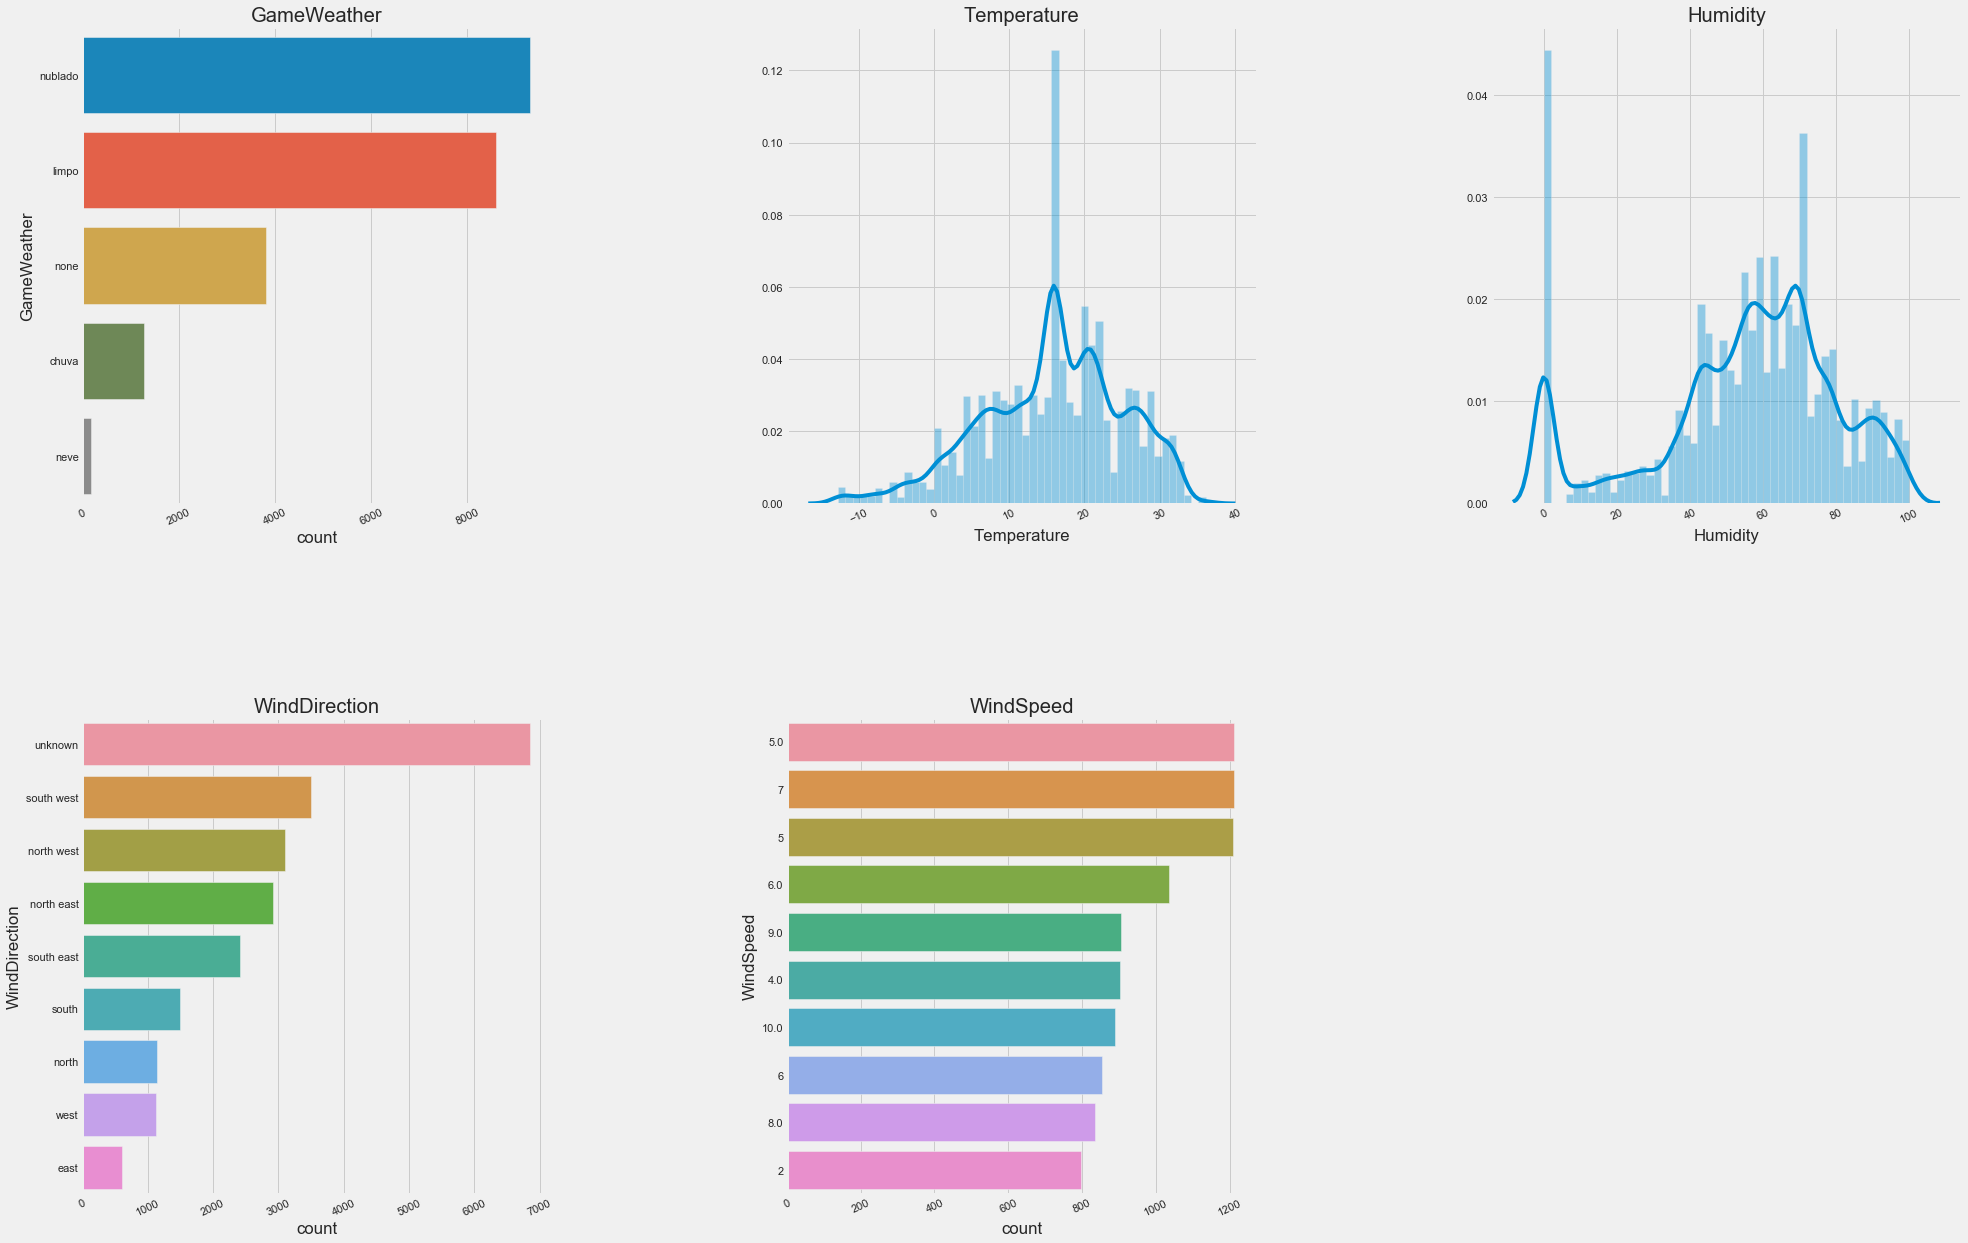

In [243]:
# Visualizando o grafico de distribuicao para cada feature do ambiente
columns_to_plot = ['GameWeather', 'Temperature', 'Humidity', 'WindDirection', 'WindSpeed']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

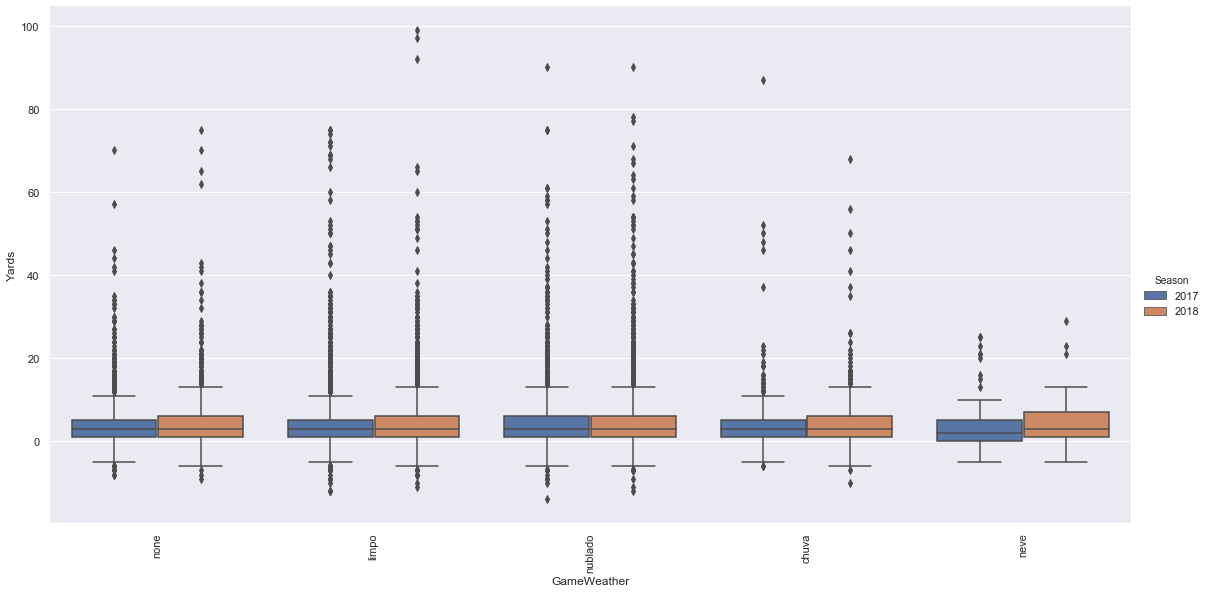

In [216]:
# Exibe o grafico de catPlot com a relacao entre o clima e Jardas
g = sns.catplot(x='GameWeather', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

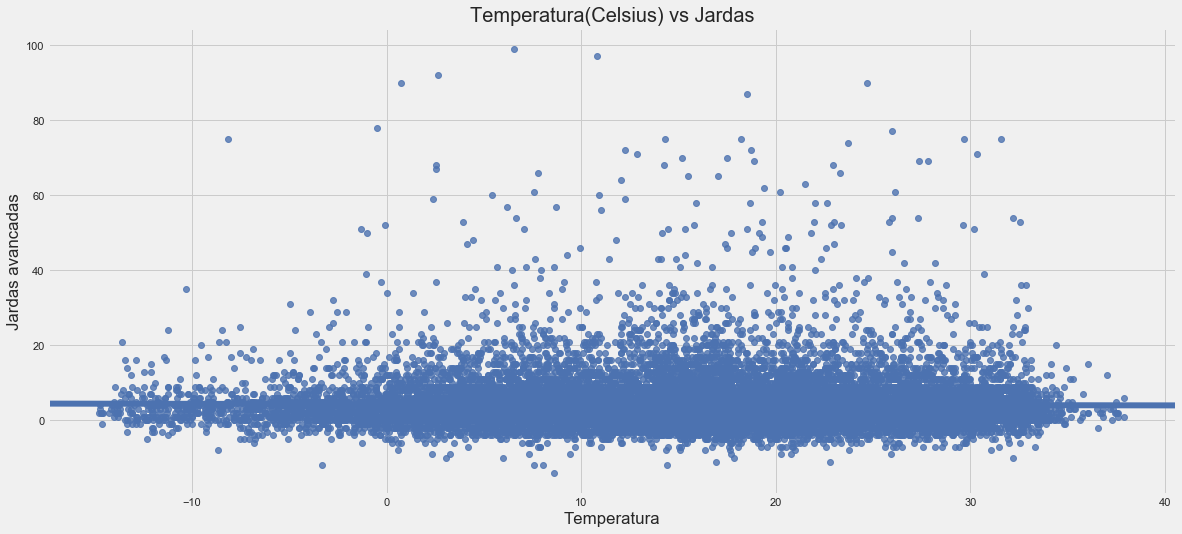

In [247]:
# Exibe o grafico de scatterPlot com a relacao entre Temperatura e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Temperature', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Temperatura')
plt.ylabel('Jardas avancadas')
plt.title('Temperatura(Celsius) vs Jardas', fontsize=20)
plt.show()

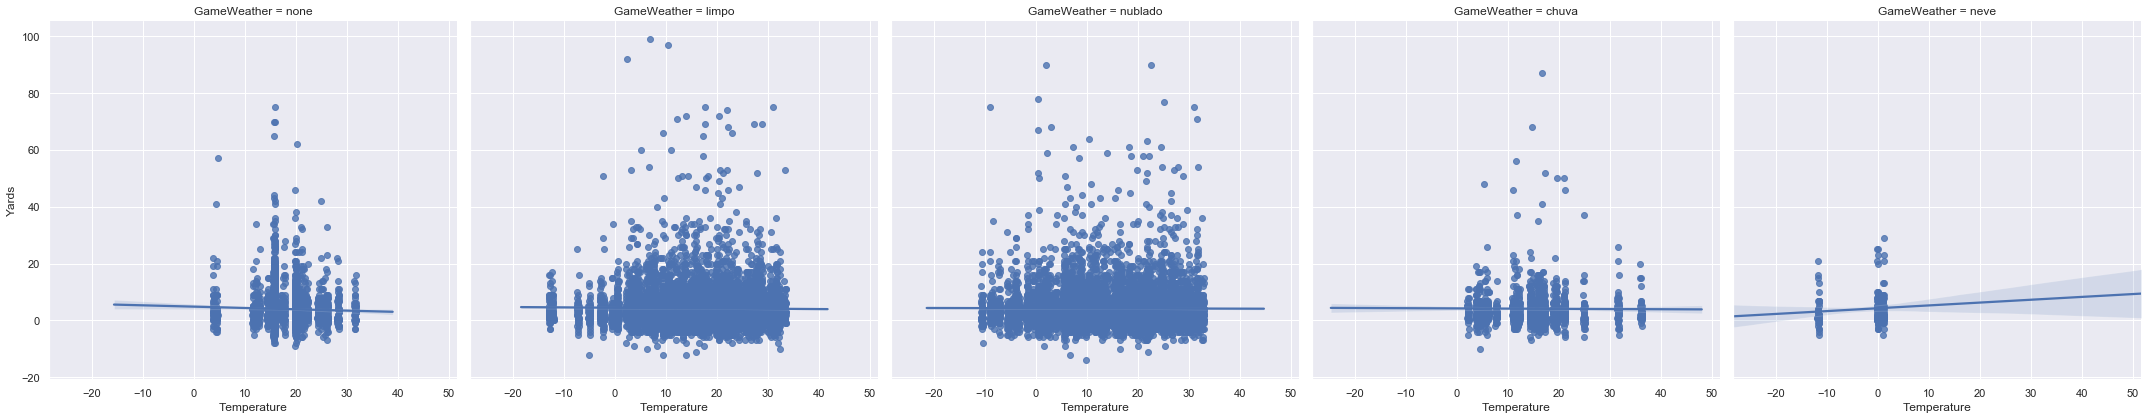

In [242]:
# Exibe o grafico linear com a relacao entre Temperatura, Clima e Jardas
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [246]:
# Tem muitos registros com umidade 0
# Talvez seja melhor fazer um tratamento
train_jog['Humidity'].value_counts().head()

0.0     2057
70.0    1314
56.0     610
67.0     604
42.0     581
Name: Humidity, dtype: int64

In [249]:
train_jog['Humidity'].describe()

count    23171.000000
mean        55.646062
std         25.277374
min          0.000000
25%         44.000000
50%         59.000000
75%         71.000000
max        100.000000
Name: Humidity, dtype: float64

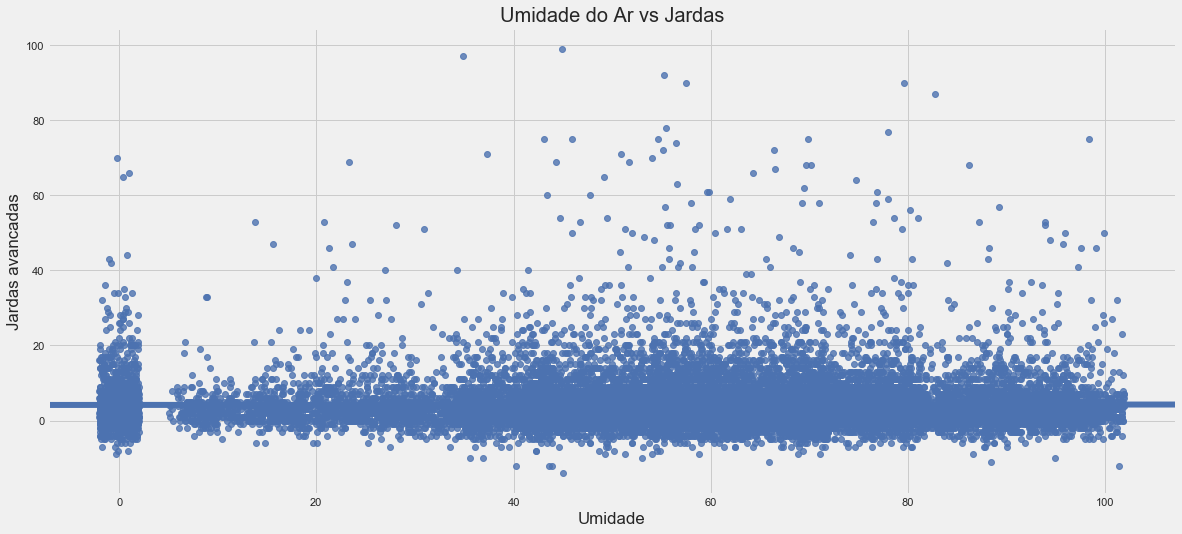

In [248]:
# Exibe o grafico de scatterPlot com a relacao entre Temperatura e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Humidity', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Umidade')
plt.ylabel('Jardas avancadas')
plt.title('Umidade do Ar vs Jardas', fontsize=20)
plt.show()

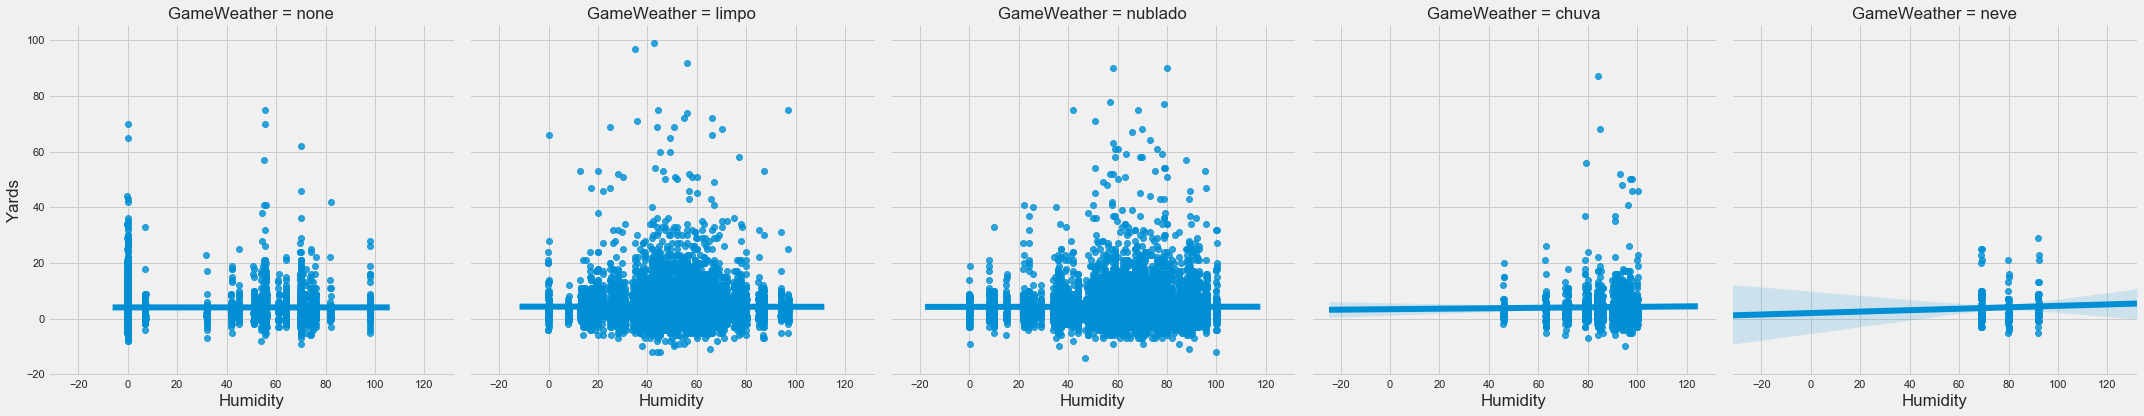

In [250]:
# Exibe o grafico linear com a relacao entre Umidade, Clima e Jardas
# A maioria da umidade 0 está no clima NONE
g = sns.lmplot(x='Humidity', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [203]:
train_jog['WindDirection'].value_counts()

unknown       6847
south west    3505
north west    3104
north east    2923
south east    2409
south         1499
north         1140
west          1130
east           614
Name: WindDirection, dtype: int64

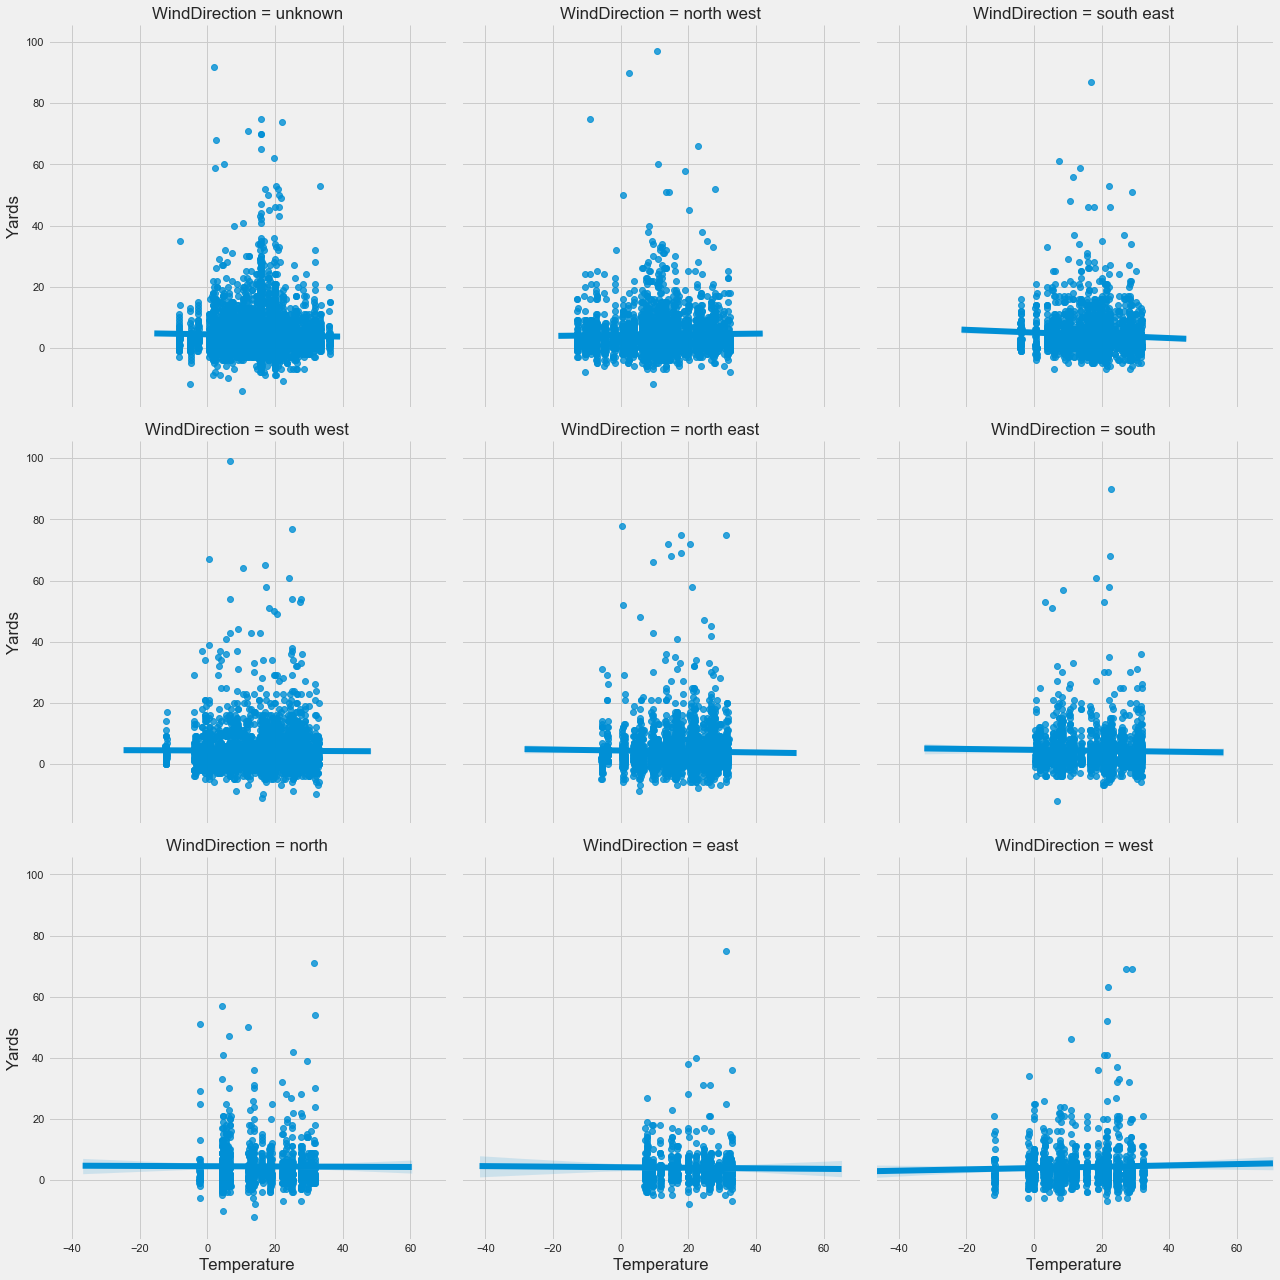

In [245]:
# Exibe o grafico linear com a relacao entre Temperatura, Direcao do Vento e Jardas
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

In [253]:
train_jog['WindSpeed'].value_counts().head()

0    13933
5     1437
6     1103
7      846
4      828
Name: WindSpeed, dtype: int64

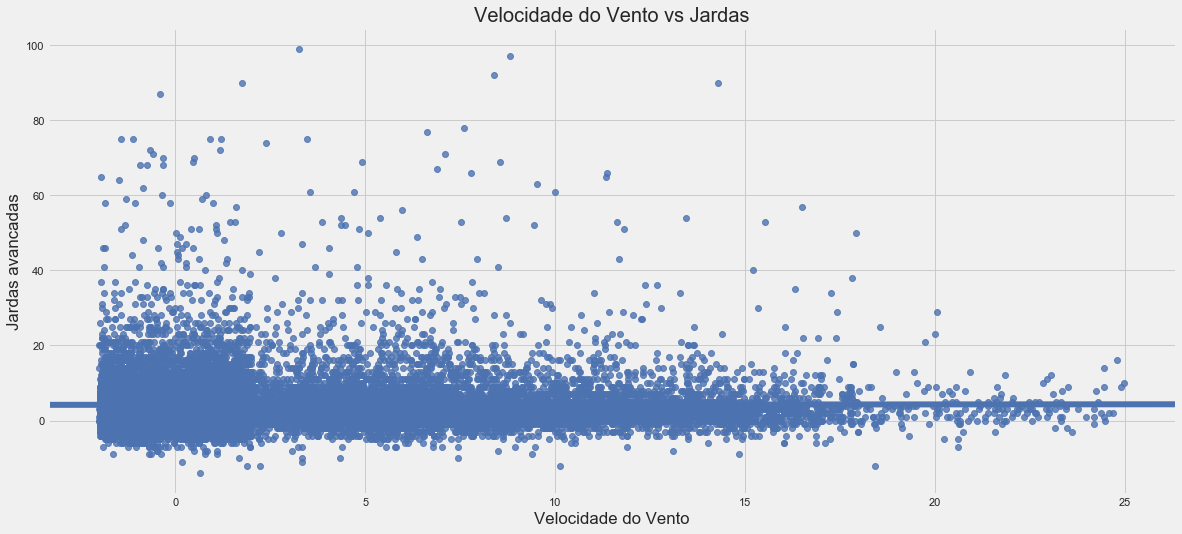

In [254]:
# Exibe o grafico de scatterPlot com a relacao entre Velocidade do Vento e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='WindSpeed', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Velocidade do Vento')
plt.ylabel('Jardas avancadas')
plt.title('Velocidade do Vento vs Jardas', fontsize=20)
plt.show()

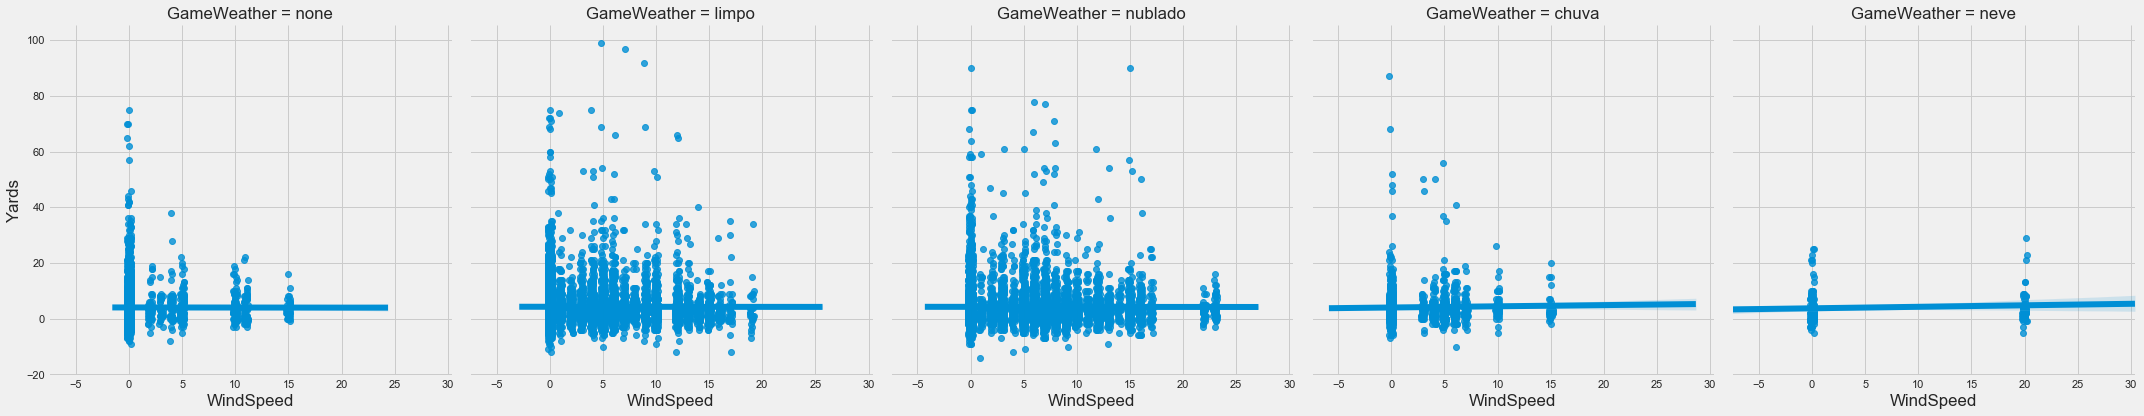

In [255]:
# Exibe o grafico linear com a relacao entre Velocidade do Vento, Clima e Jardas
# A maioria da umidade 0 está no clima NONE
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

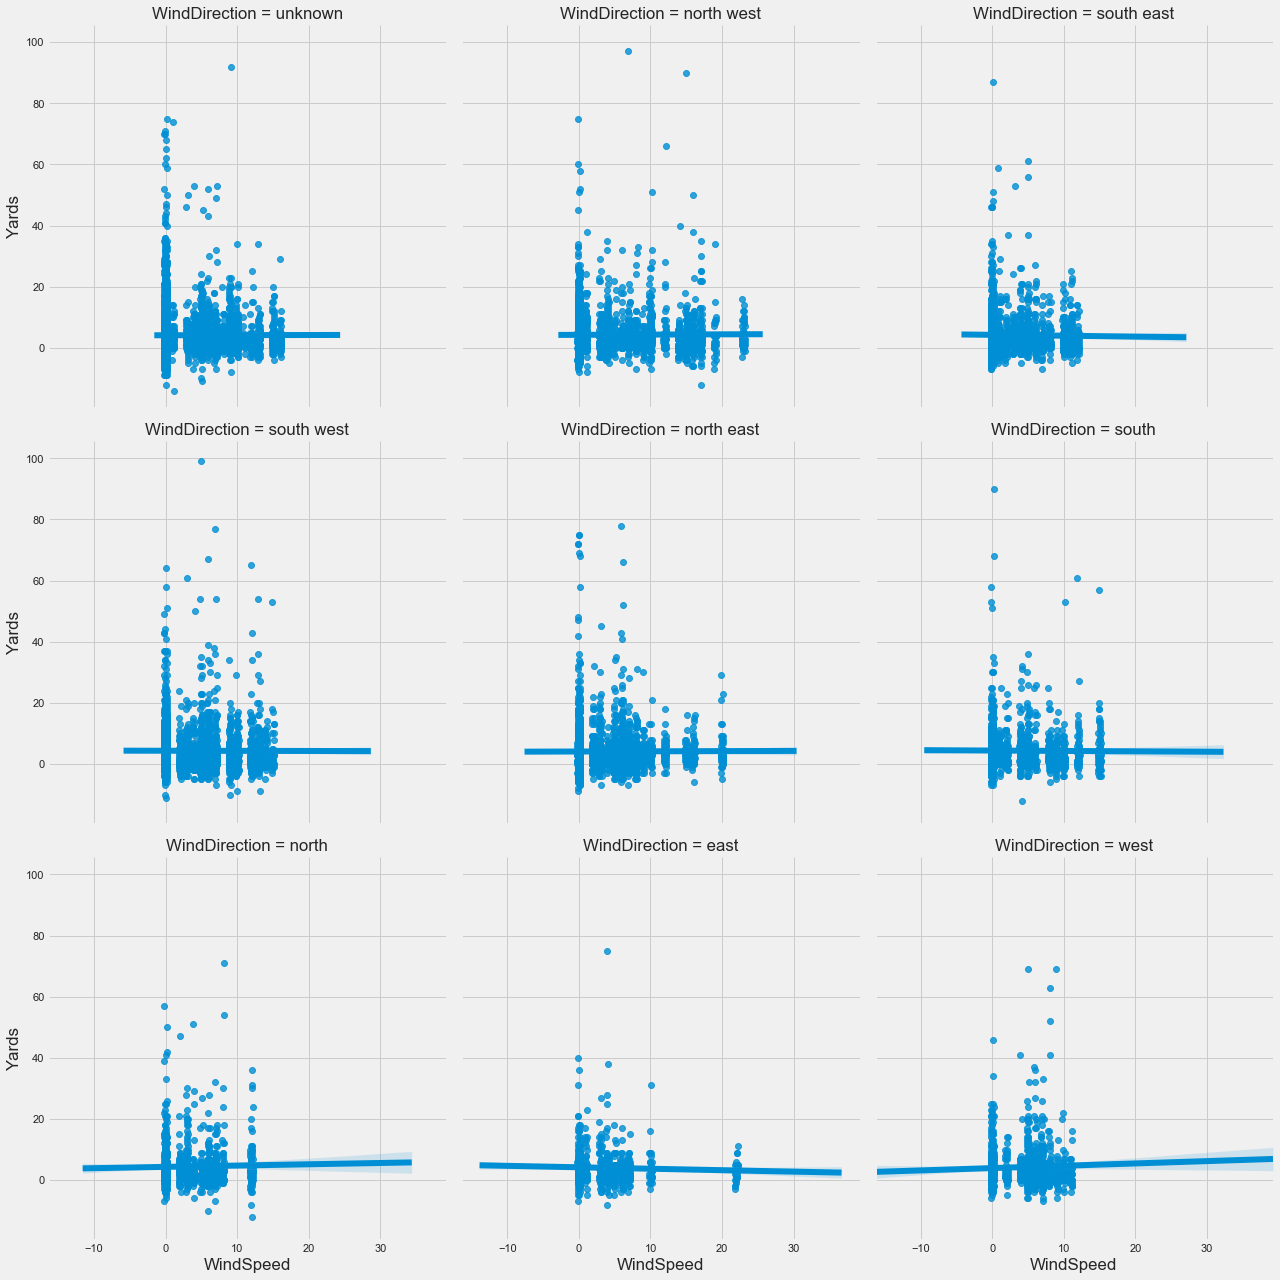

In [257]:
# Exibe o grafico linear com a relacao entre Velocidade do Vento, Direcao do Vento e Jardas
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

### Analisando as variaveis gerais da JOGADA (PlayId)
- **HomeScoreBeforePlay:** 
- **VisitorScoreBeforePlay:**
- **PossessionTeam:**
- **FieldPosition:**
- **Quarter:** quarter do jogo (1-5, 5 = overtime)
- **PlayDirection:**
- **OffensePersonnel:**
- **DefensePersonnel:**
- **OffenseFormation:**
- **DefendersInTheBox:**
- **TimeHandoff:**
- **TimeSnap:**
- **Down:**
- **Distance:**

In [ ]:
# home team score before play started
train['HomeScoreBeforePlay'].value_counts()

In [ ]:
# visitor team score before play started
train['VisitorScoreBeforePlay'].value_counts()

In [ ]:
# team with possession
train['PossessionTeam'].value_counts()

In [ ]:
# which side of the field the play is happening on
train['FieldPosition'].value_counts()

In [ ]:
# game quarter (1-5, 5 == overtime)
train['Quarter'].value_counts()

In [ ]:
# direction the play is headed
train['PlayDirection'].value_counts()

In [ ]:
# offensive team positional grouping
train['OffensePersonnel'].value_counts()

In [ ]:
# defensive team positional grouping
train['DefensePersonnel'].value_counts()

In [ ]:
# offense formation
train['OffenseFormation'].value_counts()

In [ ]:
# number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
train['DefendersInTheBox'].value_counts()

In [ ]:
# UTC time of the handoff
train['TimeHandoff'].value_counts()

In [ ]:
# UTC time of the snap
train['TimeSnap'].value_counts()

In [ ]:
# the down (1-4)
train['Down'].value_counts()

In [ ]:
# yards needed for a first down
# jardas que a equipe precisa para fazer a primeira descida.
train['Distance'].value_counts()

### Analisando as variaveis de POSICIONAMENTO DO JOGADOR

In [ ]:
# player position along the long axis of the field. See figure below.
train['X'].value_counts()

In [ ]:
# player position along the short axis of the field. See figure below.
train['Y'].value_counts()

In [ ]:
# speed in yards/second
train['S'].value_counts()

In [ ]:
# acceleration in yards/second^2
train['A'].value_counts()

In [ ]:
# distance traveled from prior time point, in yards
train['Dis'].value_counts()

In [ ]:
# orientation of player (deg)
train['Orientation'].value_counts()

In [ ]:
# angle of player motion (deg)
train['Dir'].value_counts()

In [ ]:
# the yard line of the line of scrimmage
train['YardLine'].value_counts()